In [3]:
import pandas as pd

file_path = '/content/data_processed.csv'
data1 = pd.read_csv(file_path)

In [4]:
# Seleccionar solo las columnas numéricas del DataFrame
data = data1.select_dtypes(include='number')
#Elimina una columna en data
data = data.drop(columns=['FM Gap Time', 'FCE Waiting Time', 'FCE2 Charging Space Time'])

In [5]:
# count values de steel type
data['steel_type'].value_counts()

,count
steel_type,
2,6421
1,4745
0,4740
3,2313


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# --------- Bloque 1: Tratamiento de Outliers usando el Rango Intercuartílico (IQR) ---------

# Calcular el IQR y los límites
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Limites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover outliers reemplazándolos con NaN
data_iqr_treated = data.mask((data < lower_bound) | (data > upper_bound))

# Rellenar los NaN resultantes si se desea, por ejemplo, usando la mediana
data_iqr_treated.fillna(data.median(), inplace=True)


# --------- Bloque 2: Tratamiento de Outliers usando Normalización ---------

# Escalar el DataFrame
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_scaled, columns=data.columns)

# Opcional: Para datos escalados, puedes reemplazar los valores que estén a más de 3 desviaciones estándar de la media
# con los límites de 3 desviaciones estándar.
data_normalized[(data_normalized > 3) | (data_normalized < -3)] = np.sign(data_normalized) * 3


# --------- Bloque 3: Comparación de los Resultados ---------

# Comparación de las medias de cada método de tratamiento para observar los efectos
comparison_df = pd.DataFrame({
    "Original_Mean": data.mean(),
    "IQR_Treated_Mean": data_iqr_treated.mean(),
    "Normalized_Mean": data_normalized.mean()
})

print("Comparación de las medias antes y después de los tratamientos de outliers:")
print(comparison_df)

Comparación de las medias antes y después de los tratamientos de outliers:
                             Original_Mean  IQR_Treated_Mean  Normalized_Mean
FCE Number                        1.500082          1.500082    -2.032880e-17
Slab Width                     1440.705143       1440.705143    -2.184005e-17
Slab Thickness                  221.409463        222.428289    -2.325536e-03
Slab Lenght                    9938.183600       9938.183600     4.425981e-06
Slab Weight                      24.017879         24.017081    -2.740351e-05
slab_width_charge              1154.191448       1459.796751     8.892022e-17
Commander Slab Speed             21.014541         21.112971     4.974828e-03
PC Width                       1481.189363       1481.189363     3.088808e-16
PC Thickness                    226.481475        223.953455    -6.988522e-04
PC Length                      9673.954333       9673.954333    -3.744009e-17
Coil Thickness                    5.206908          4.664422    -1.

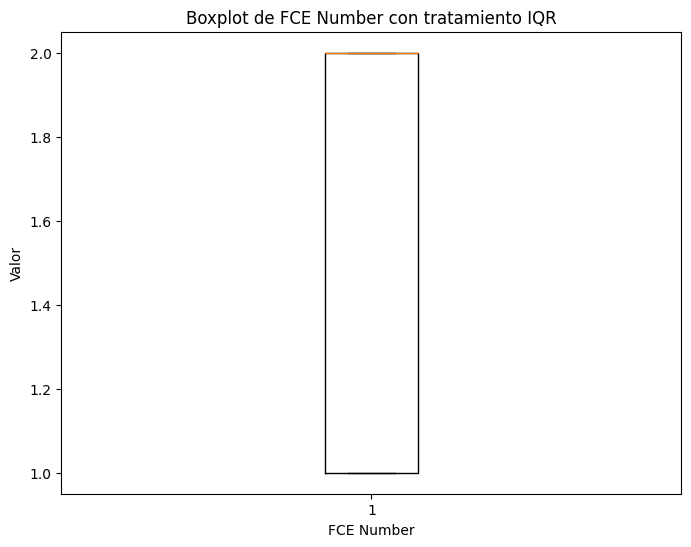

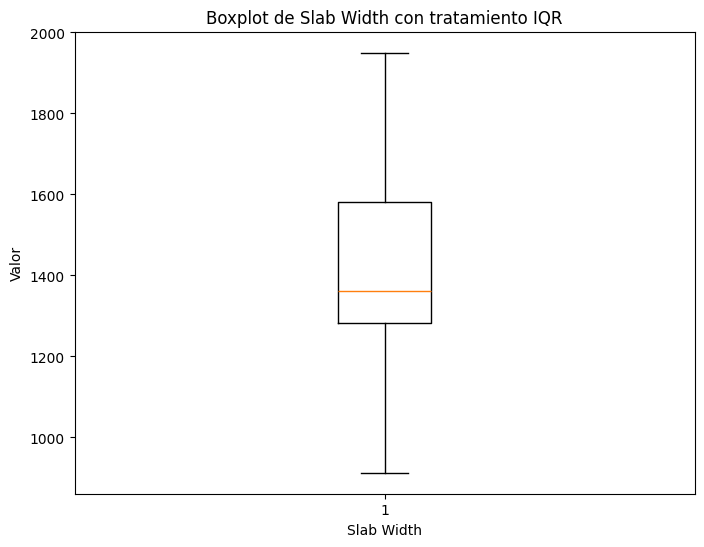

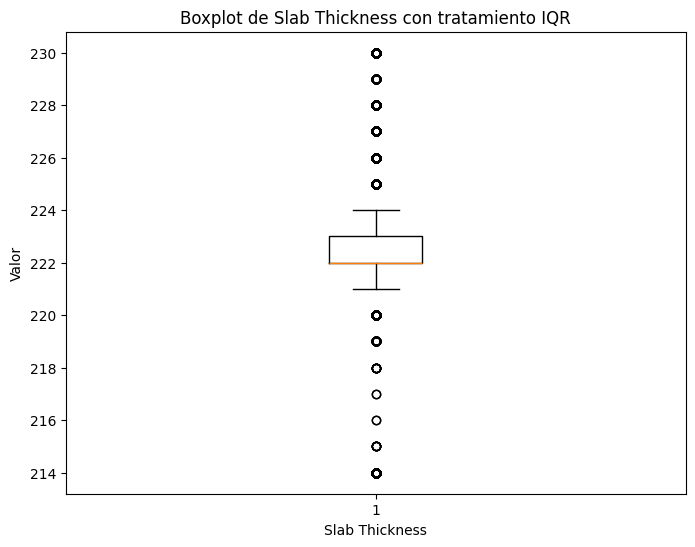

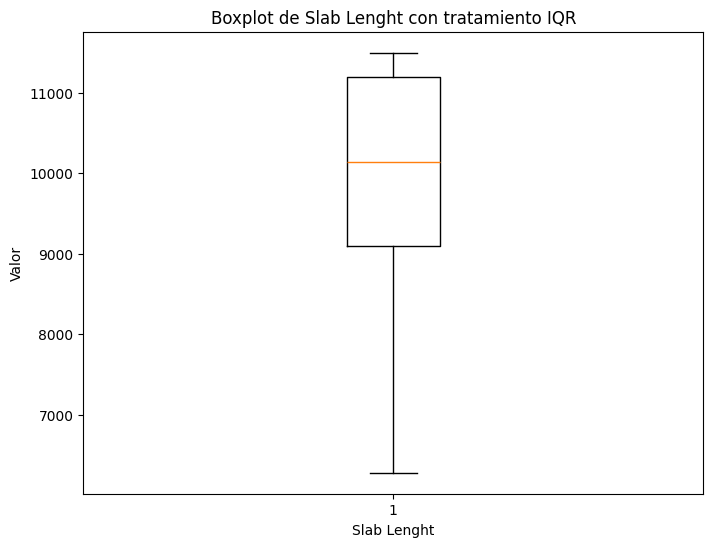

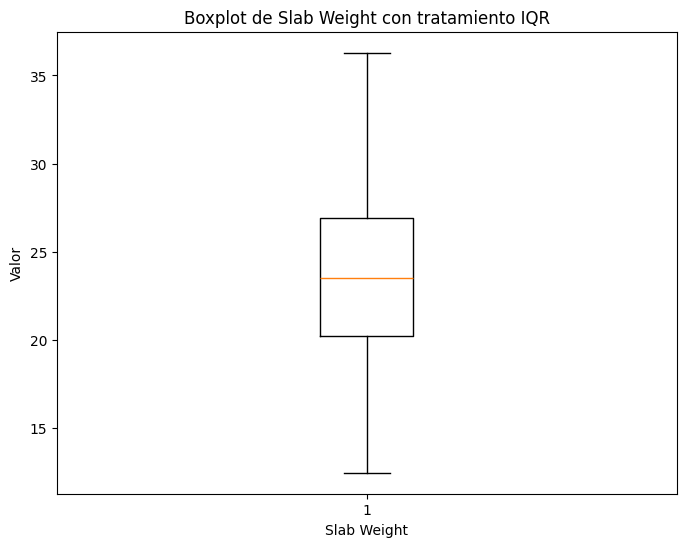

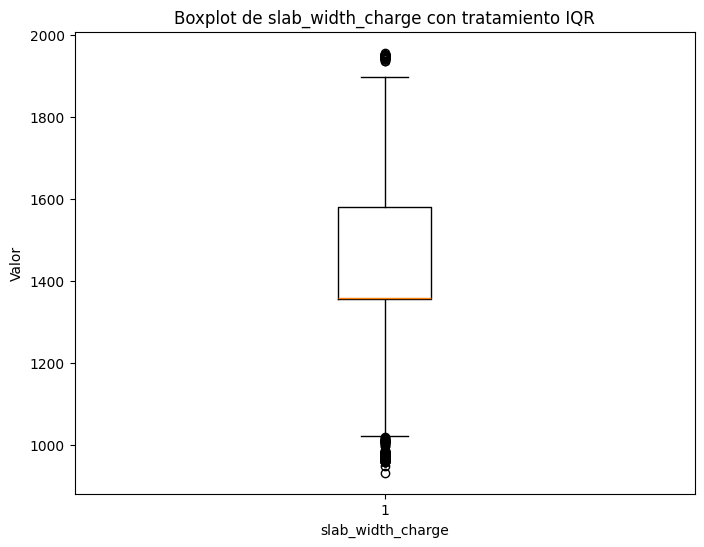

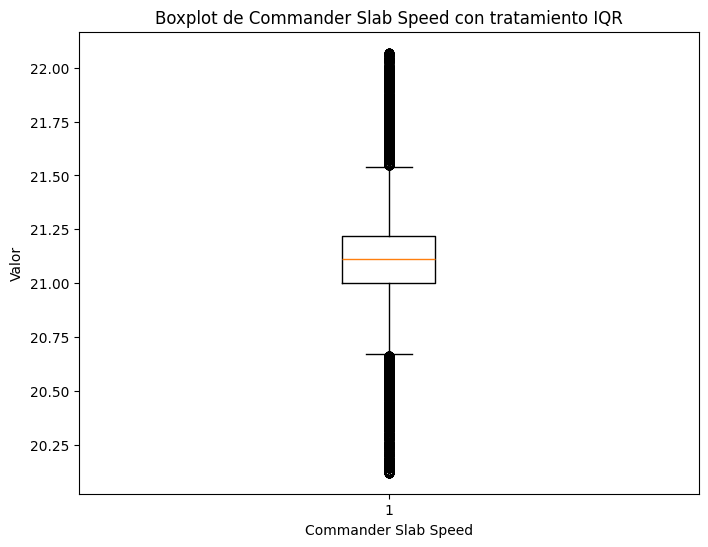

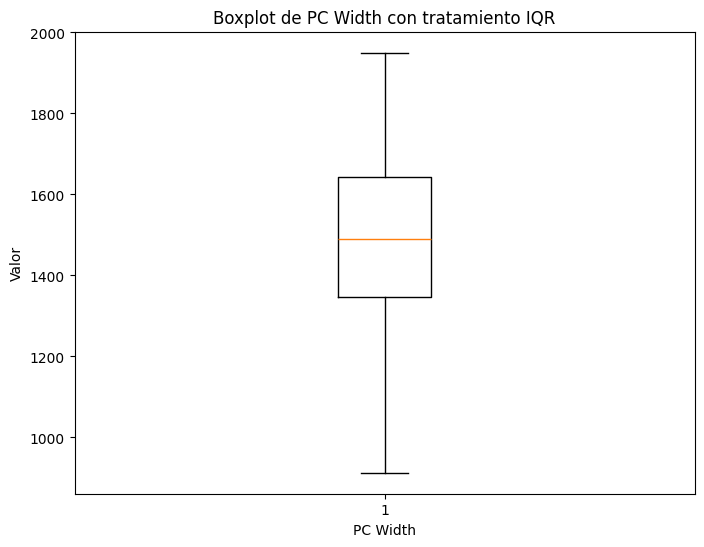

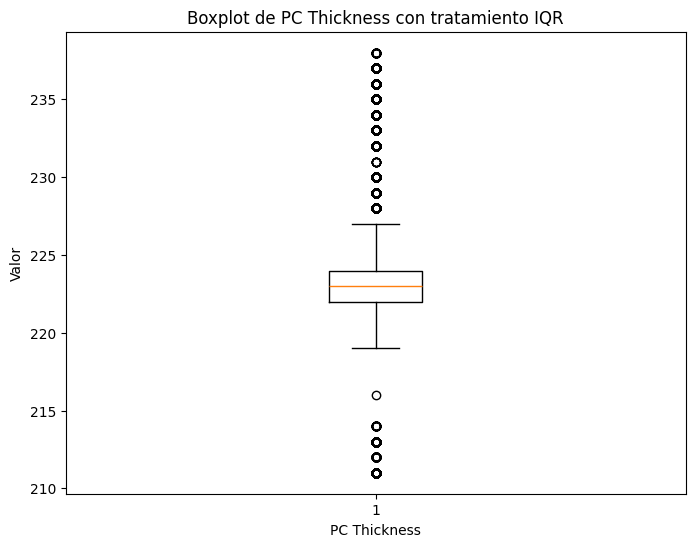

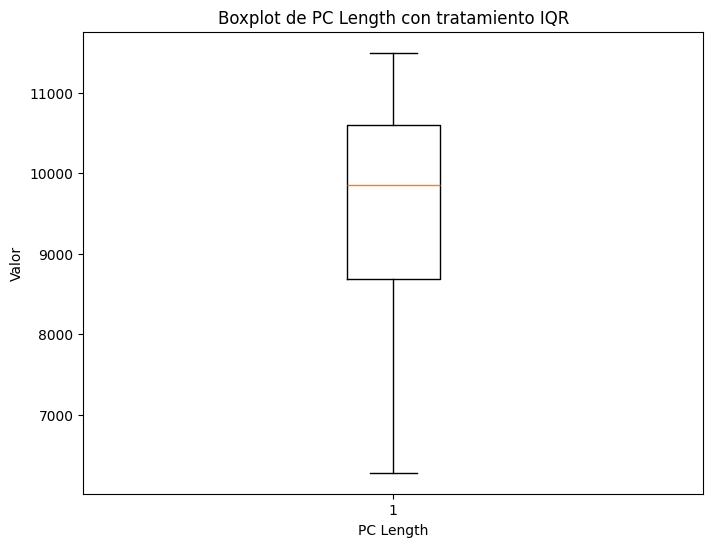

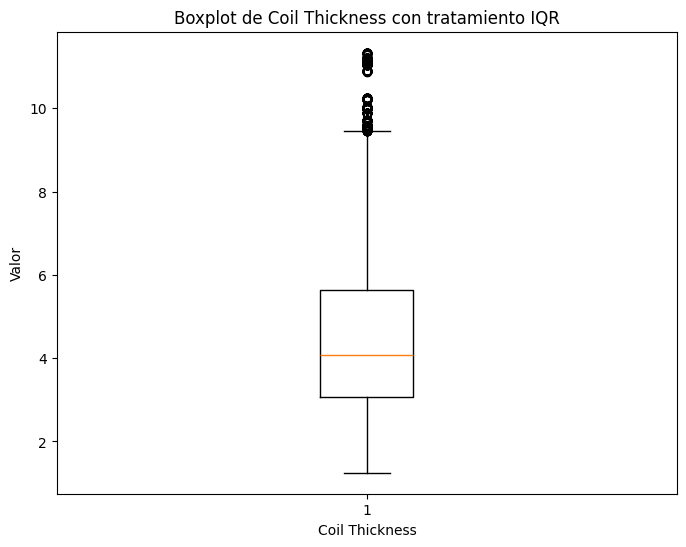

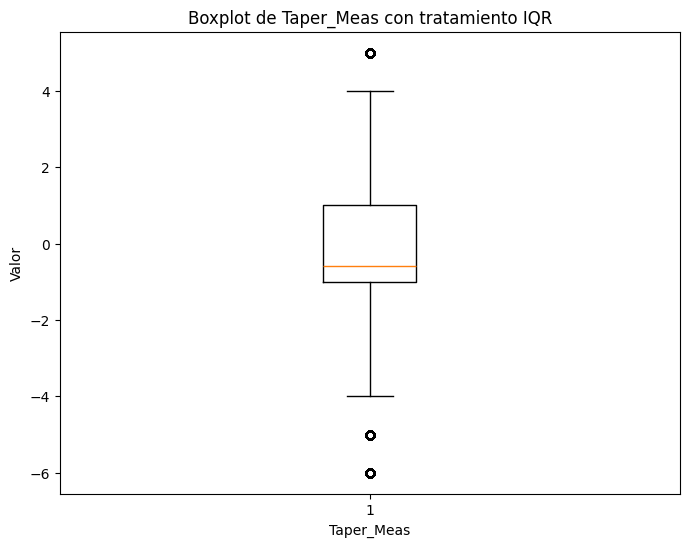

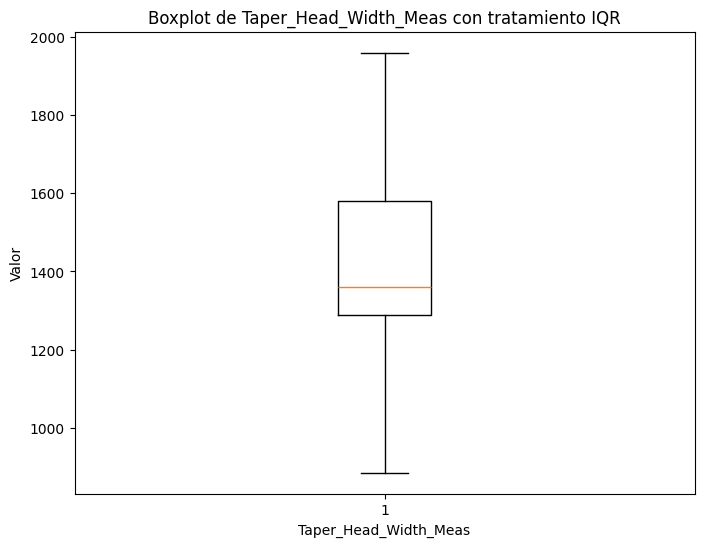

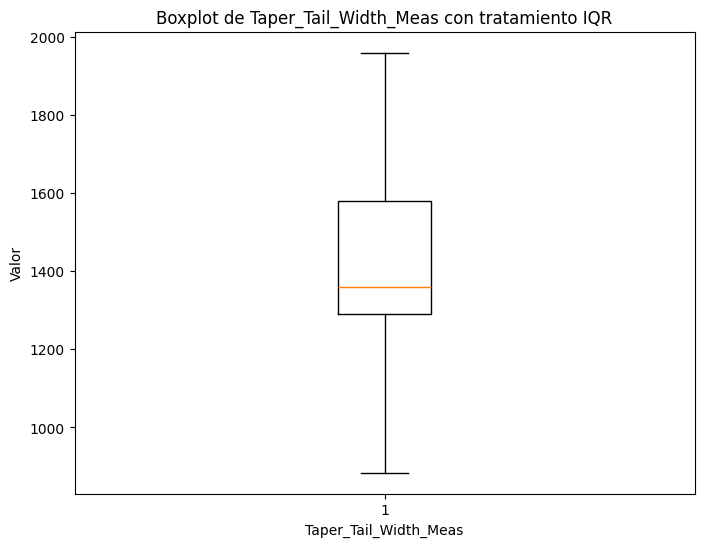

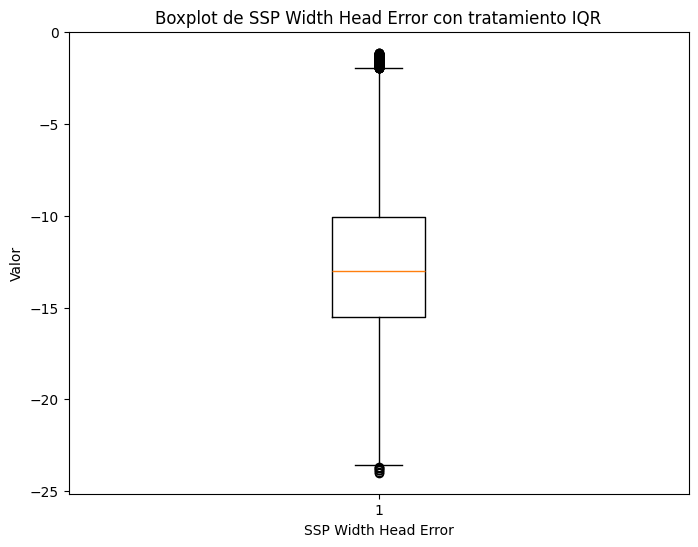

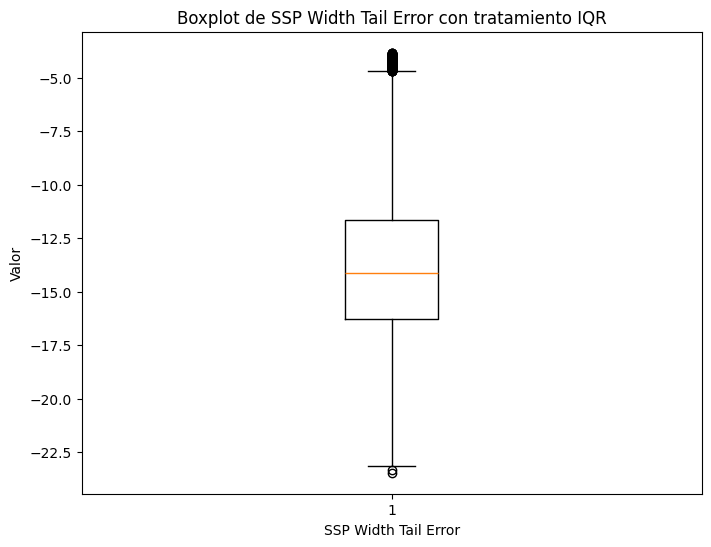

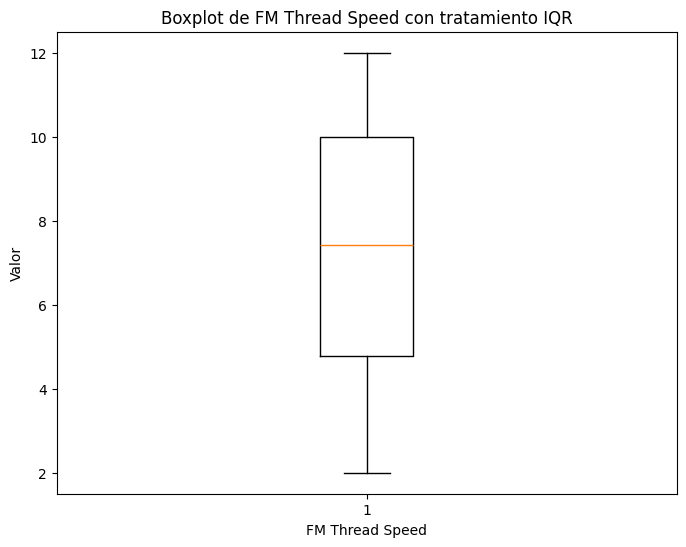

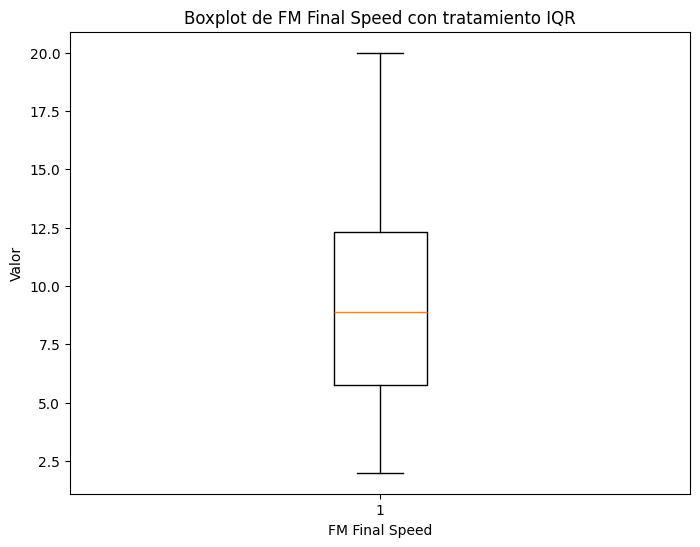

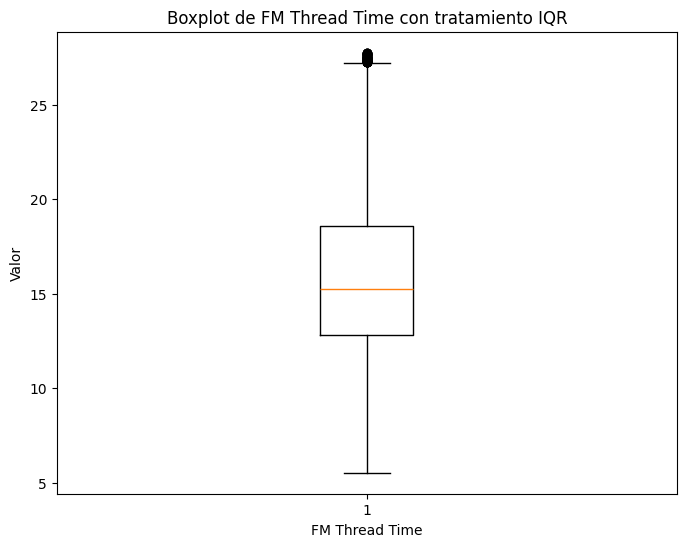

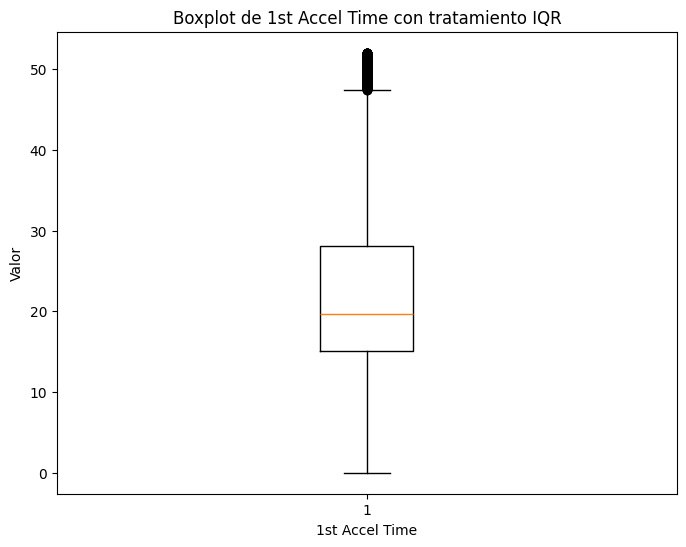

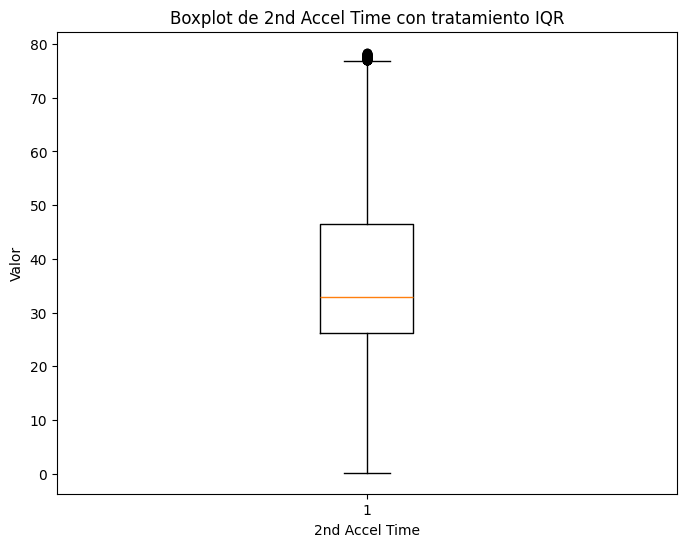

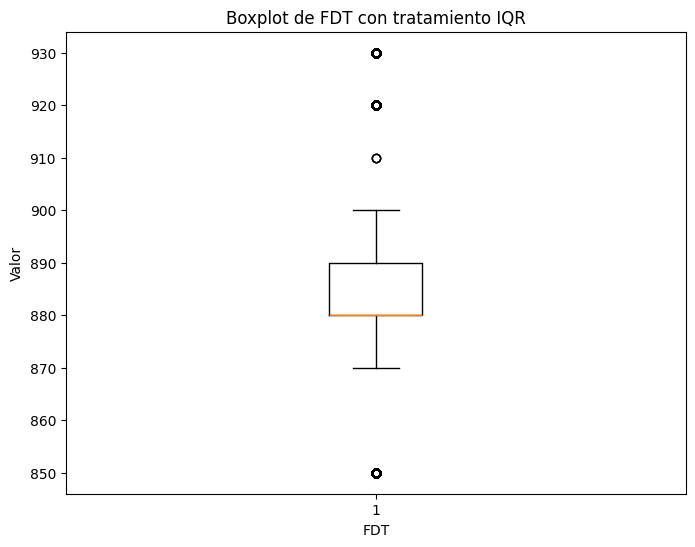

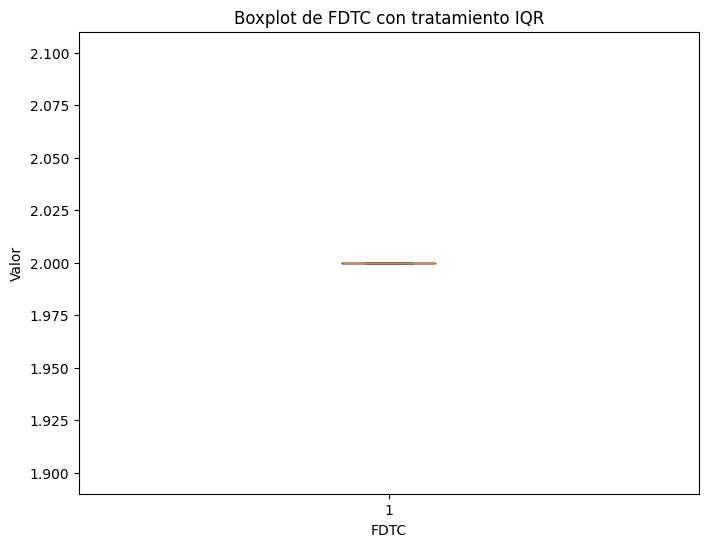

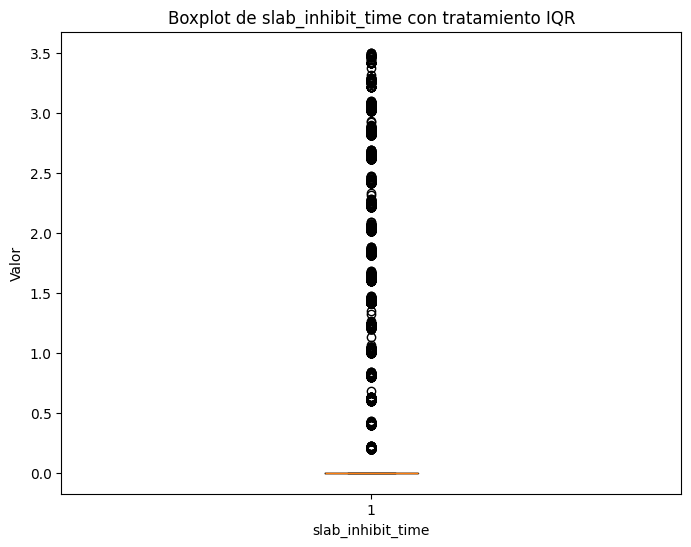

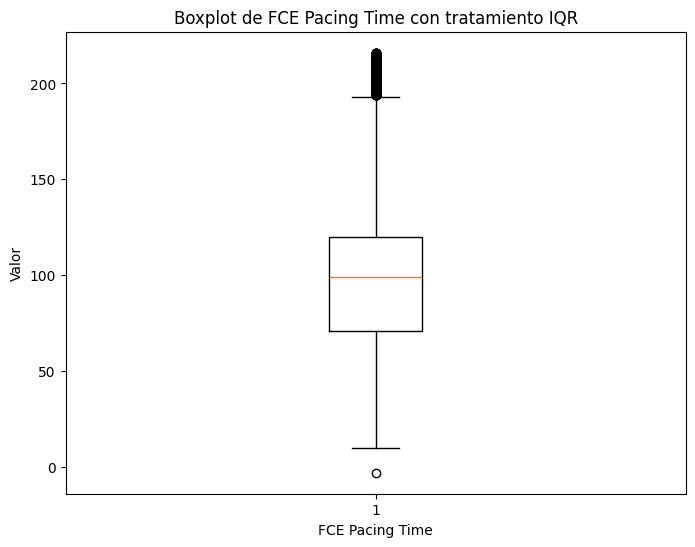

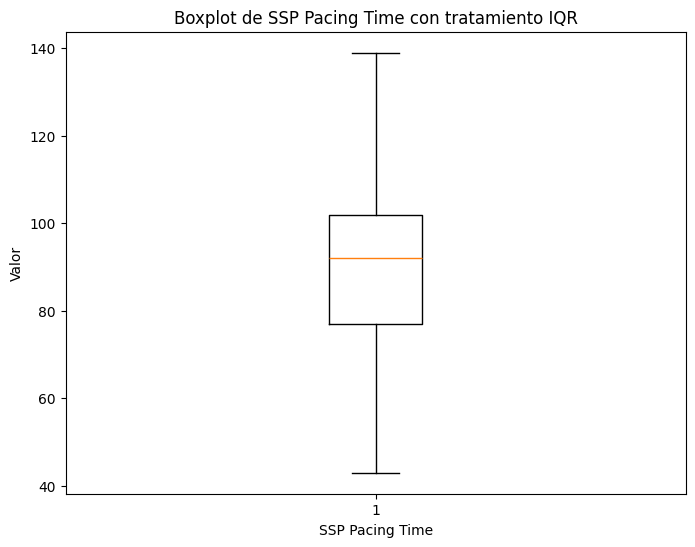

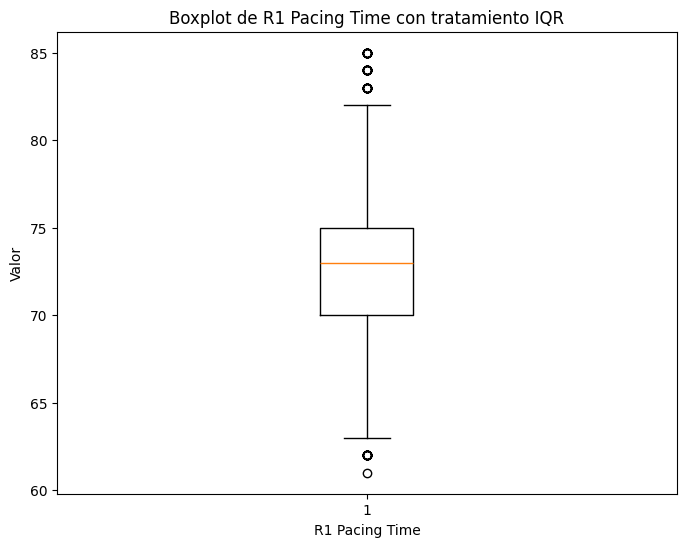

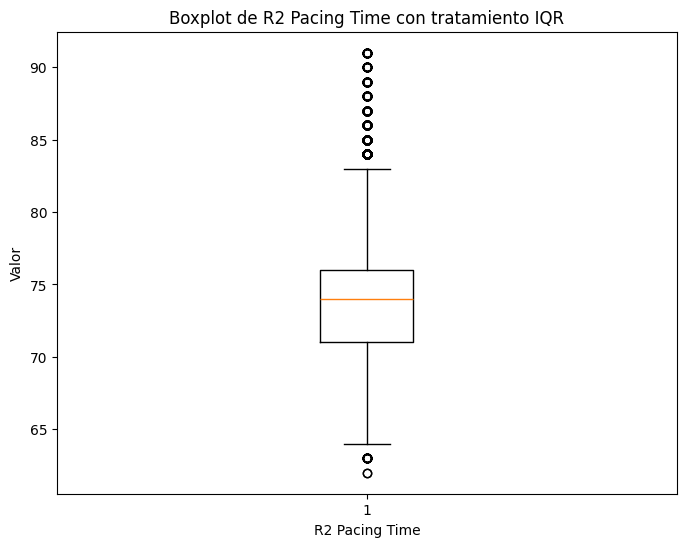

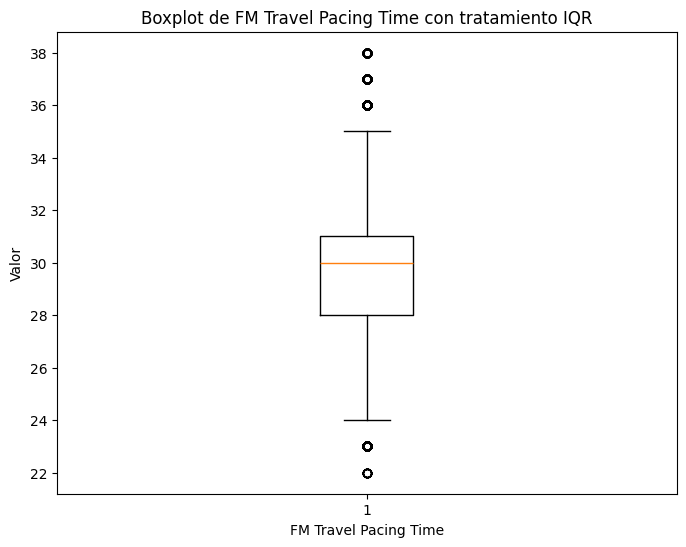

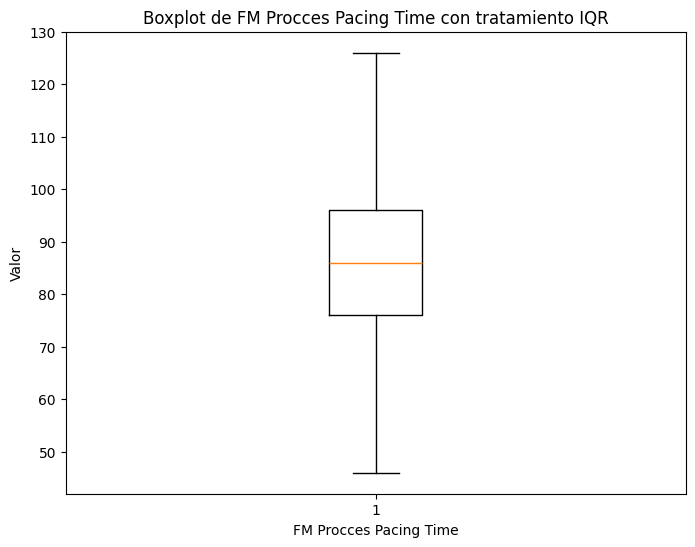

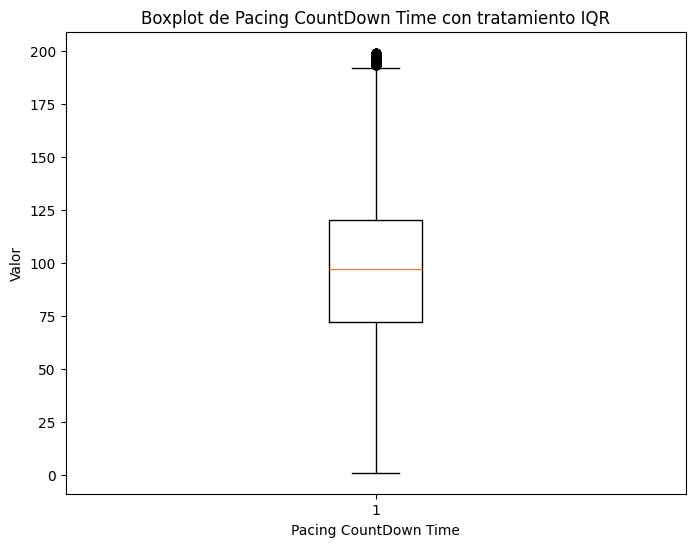

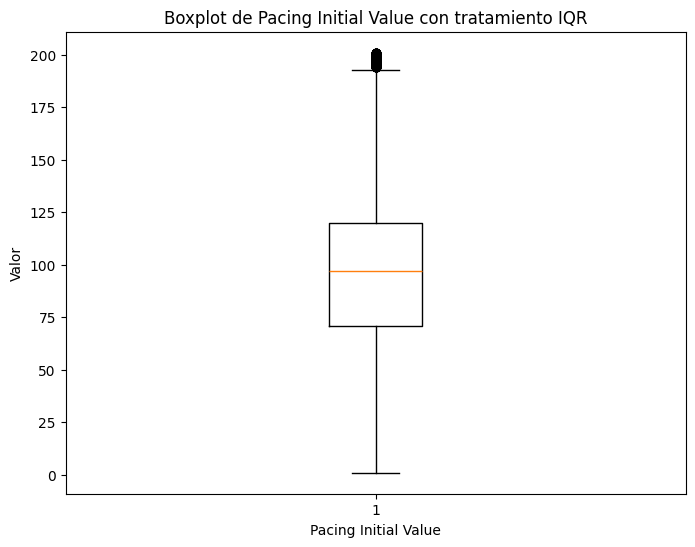

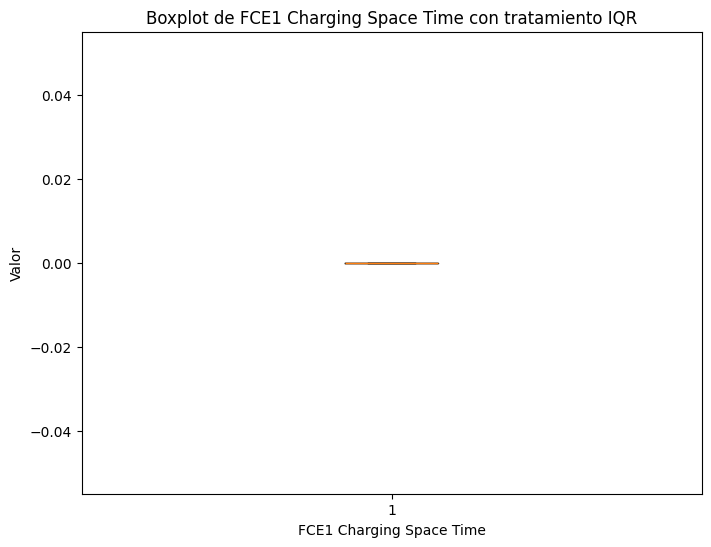

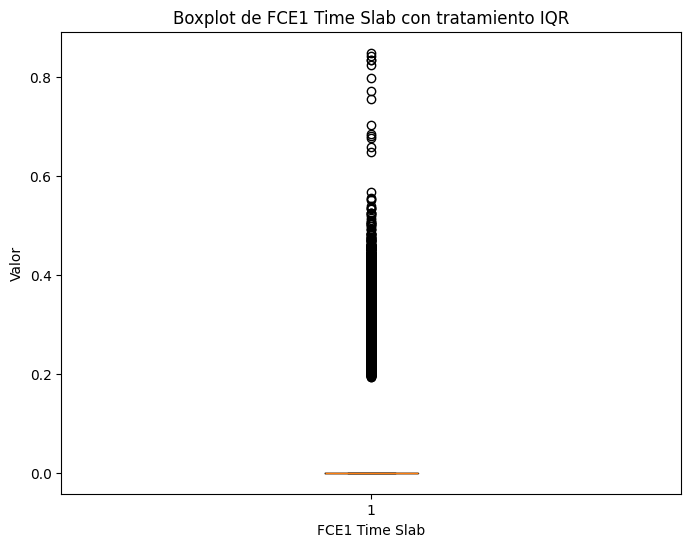

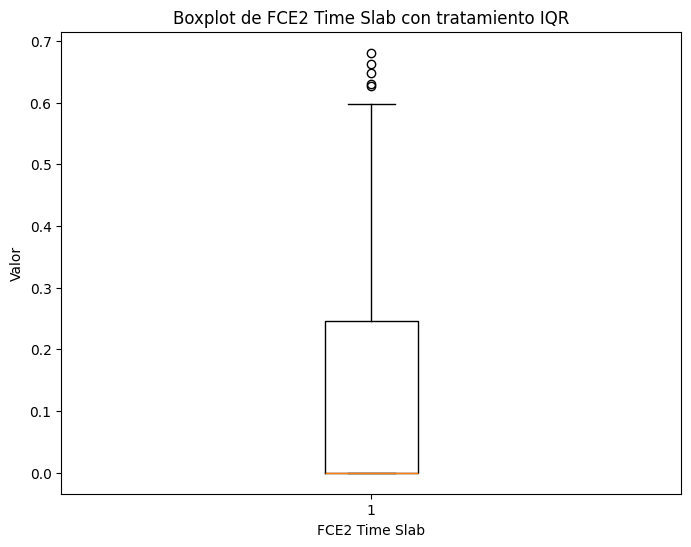

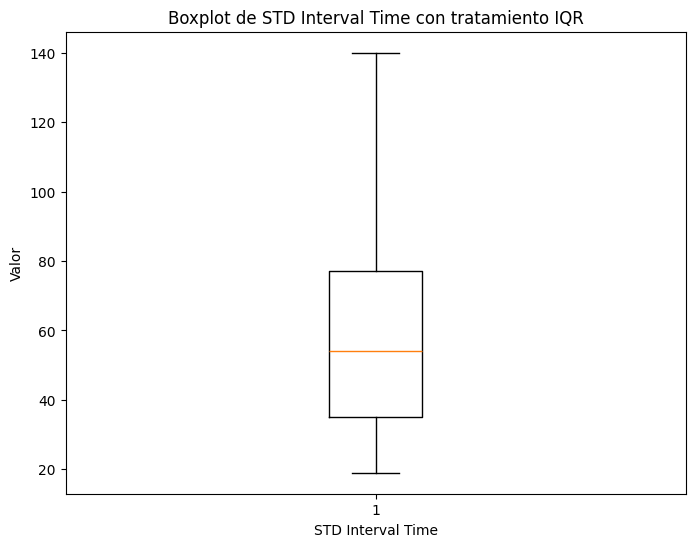

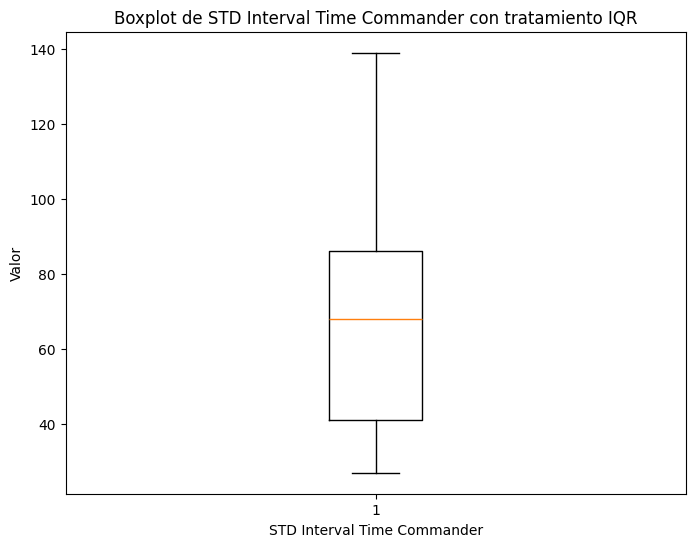

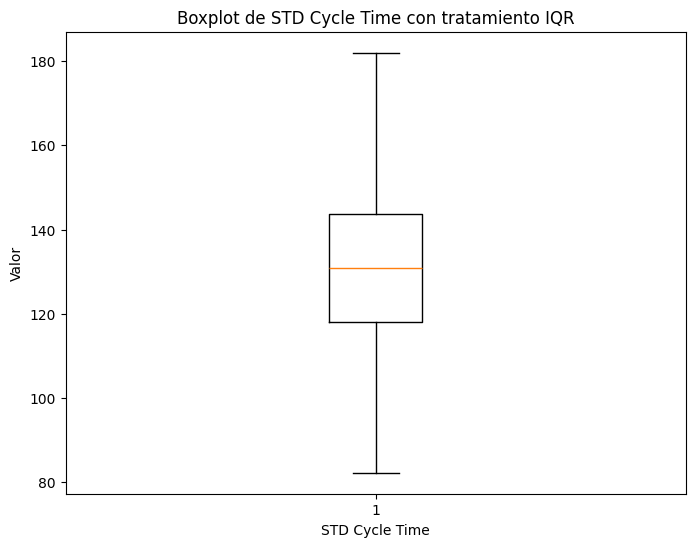

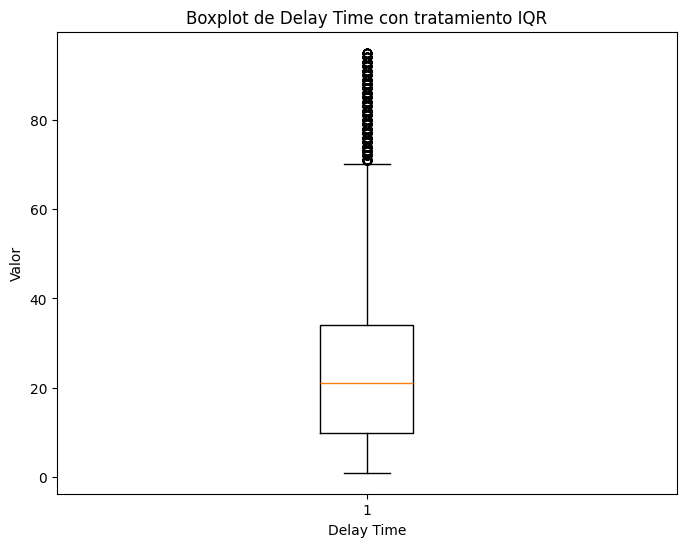

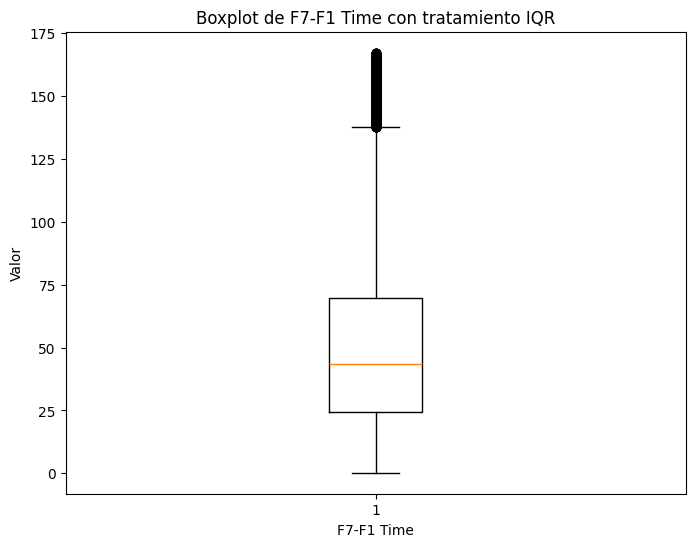

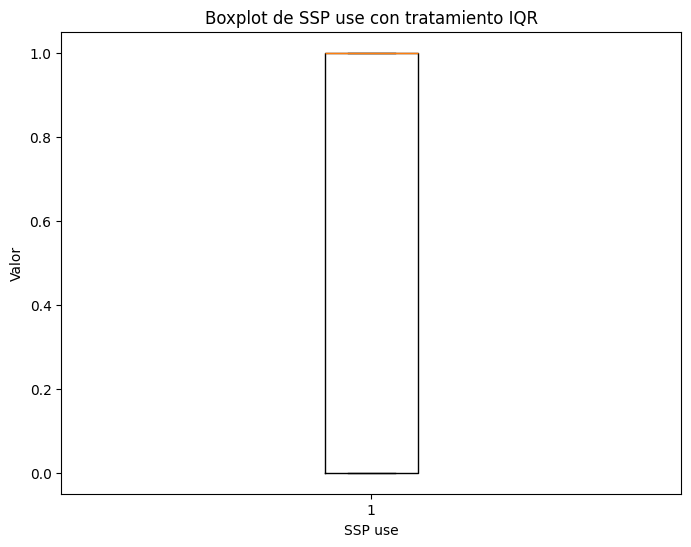

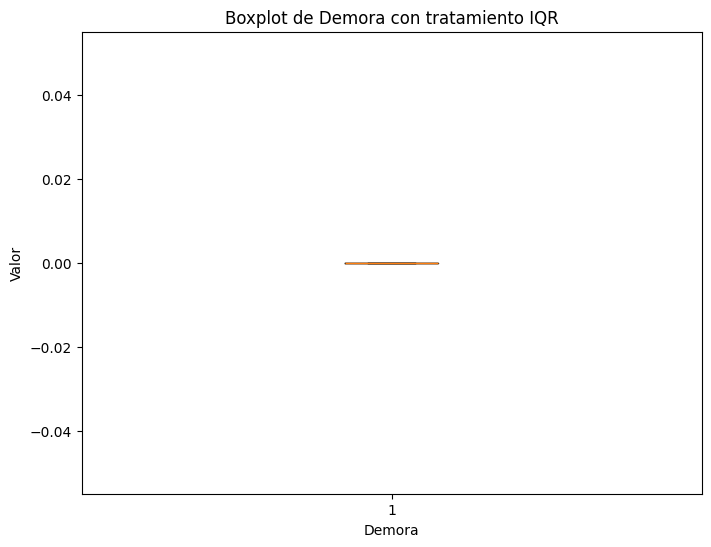

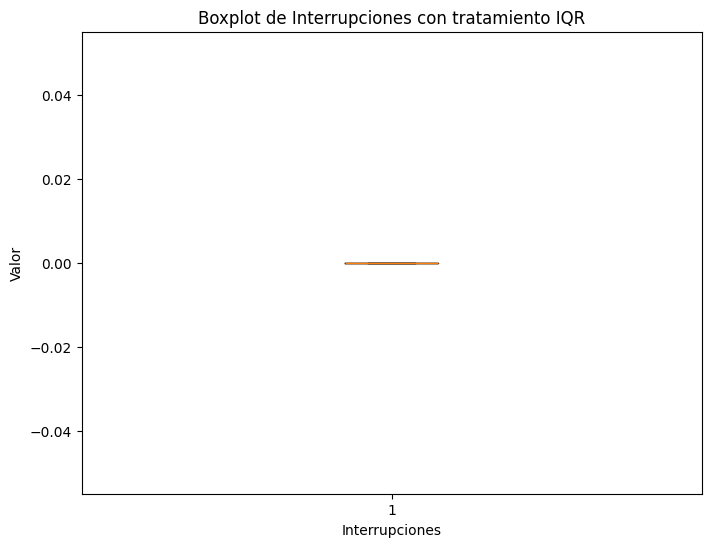

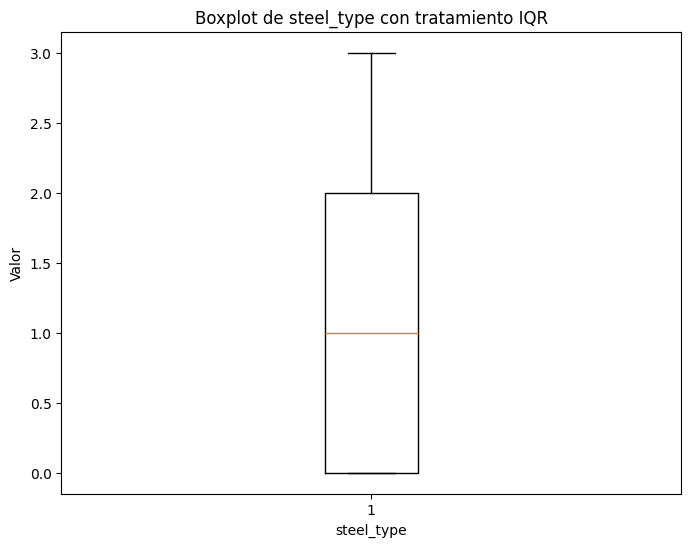

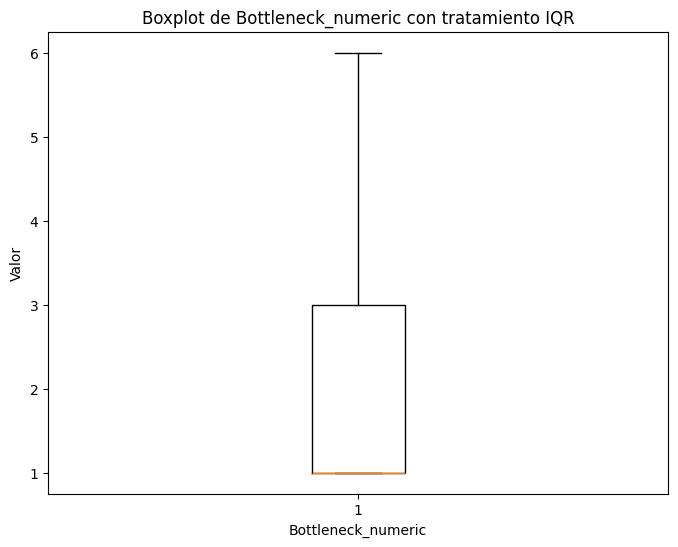

In [7]:
# prompt:  Grafica los oultiers de IQR_Treated_Mean

import matplotlib.pyplot as plt

# Obtener los outliers de IQR_Treated_Mean
outliers_iqr = data_iqr_treated[(data_iqr_treated < lower_bound) | (data_iqr_treated > upper_bound)]

# Graficar los outliers para cada columna
for column in outliers_iqr.columns:
  plt.figure(figsize=(8, 6))
  plt.boxplot(data_iqr_treated[column])
  plt.title(f"Boxplot de {column} con tratamiento IQR")
  plt.xlabel(column)
  plt.ylabel("Valor")

  # Mostrar valores de los outliers en el gráfico
  outliers_column = outliers_iqr[column][outliers_iqr[column].notnull()]
  if not outliers_column.empty:
    plt.scatter(x=[1] * len(outliers_column), y=outliers_column, color='red', label='Outliers')
    plt.legend()

  plt.show()

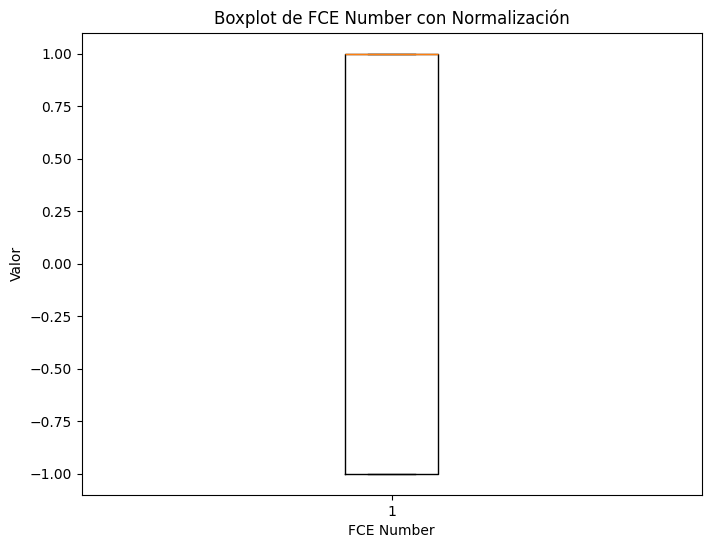

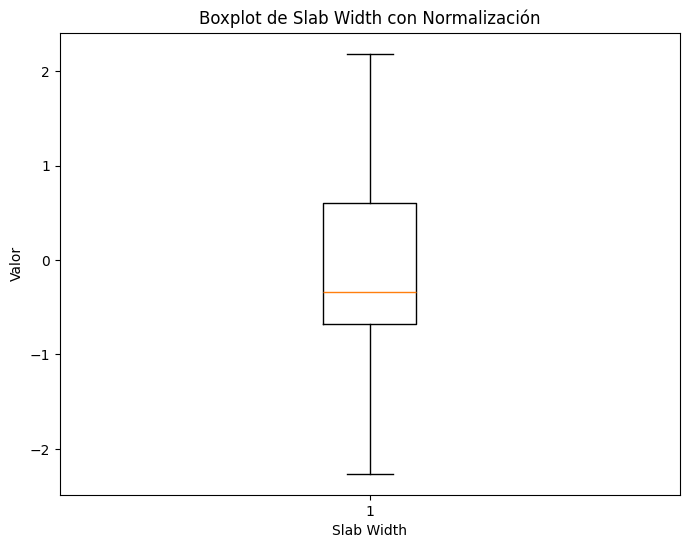

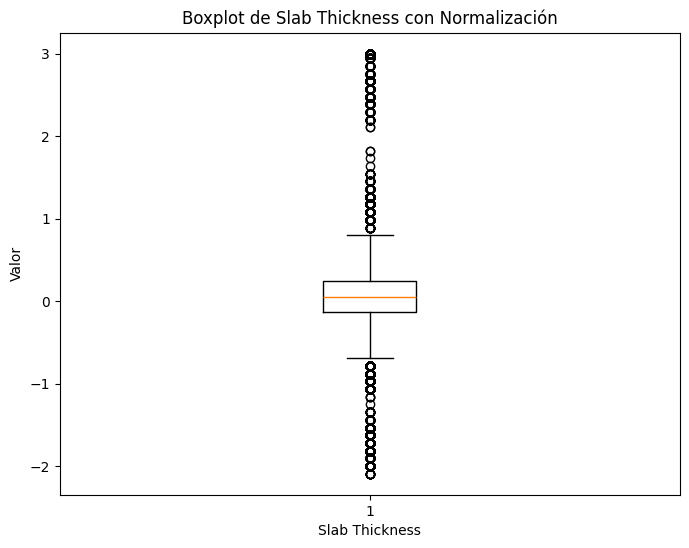

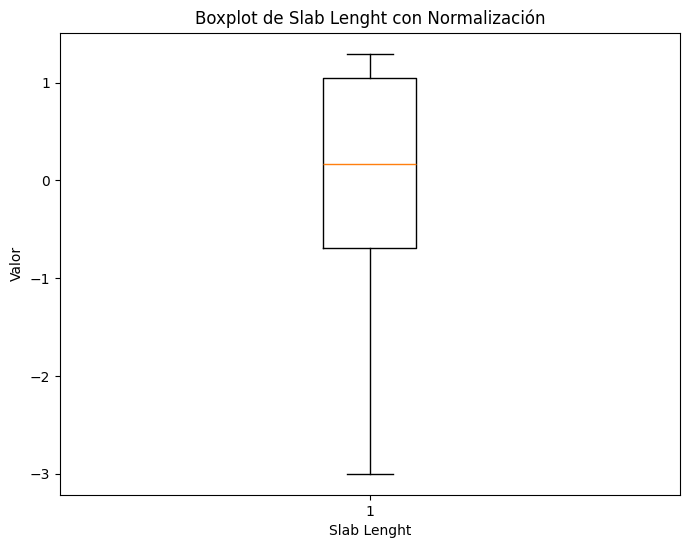

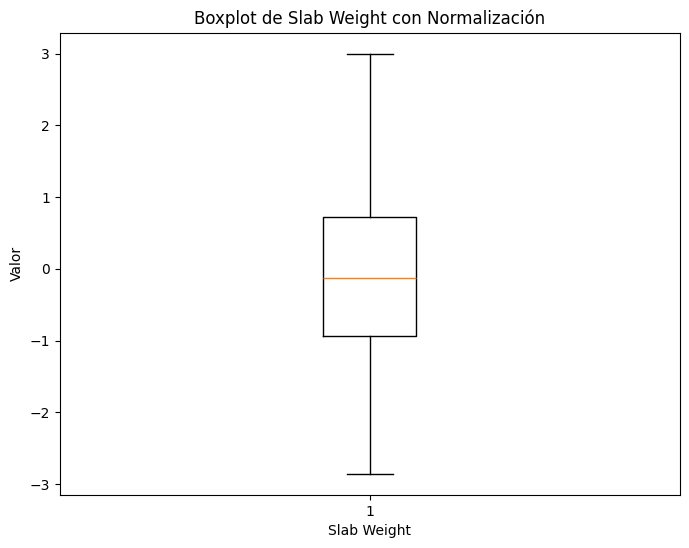

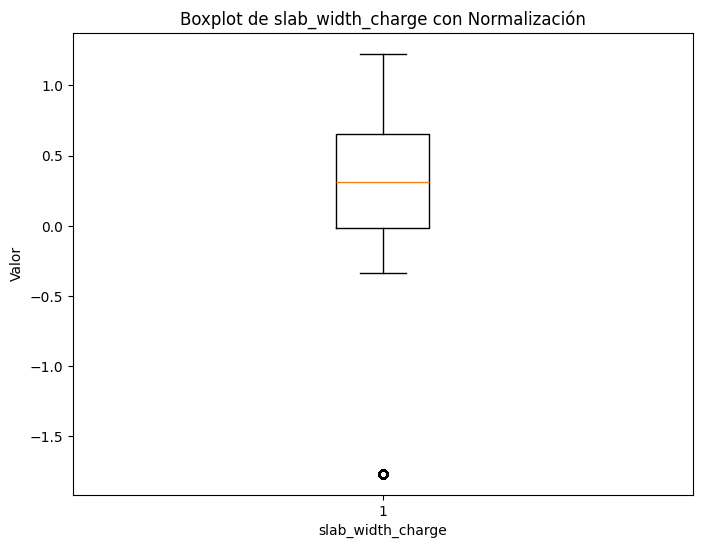

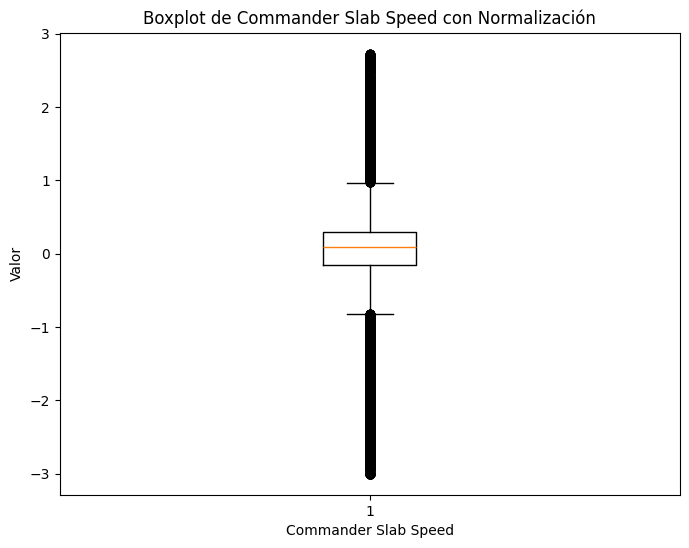

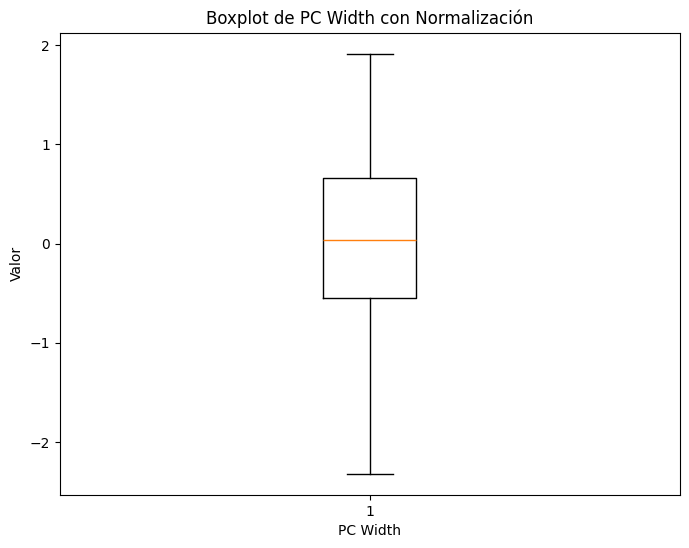

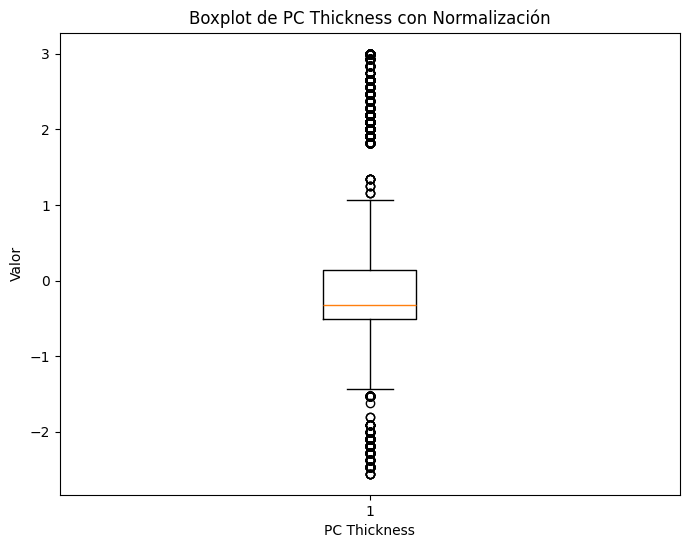

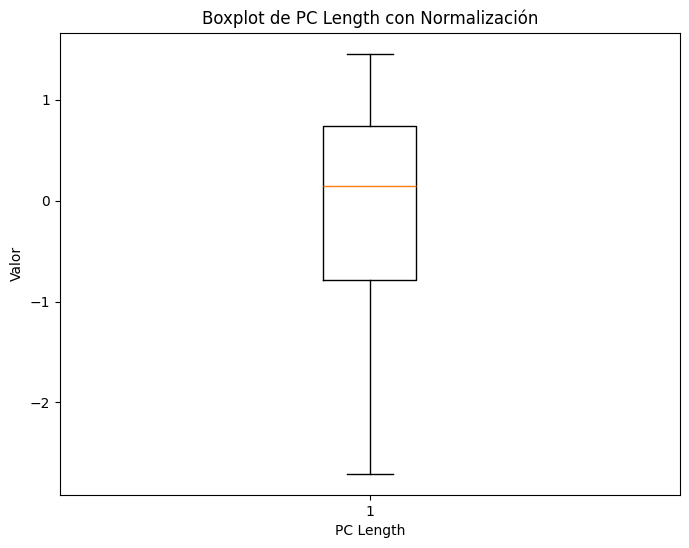

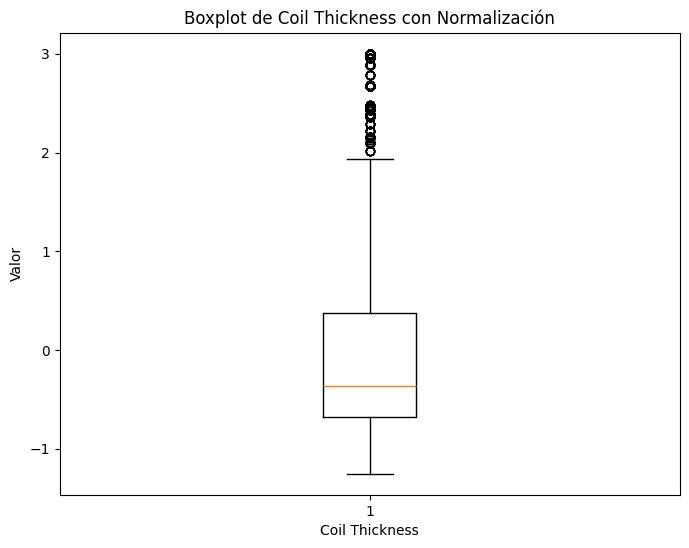

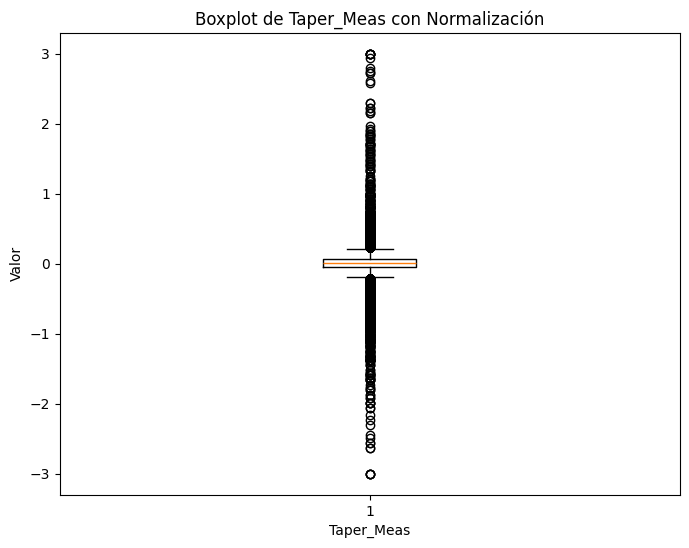

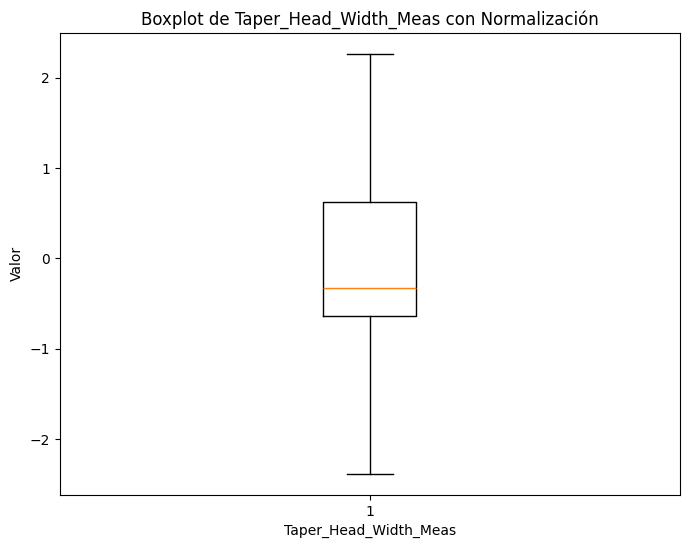

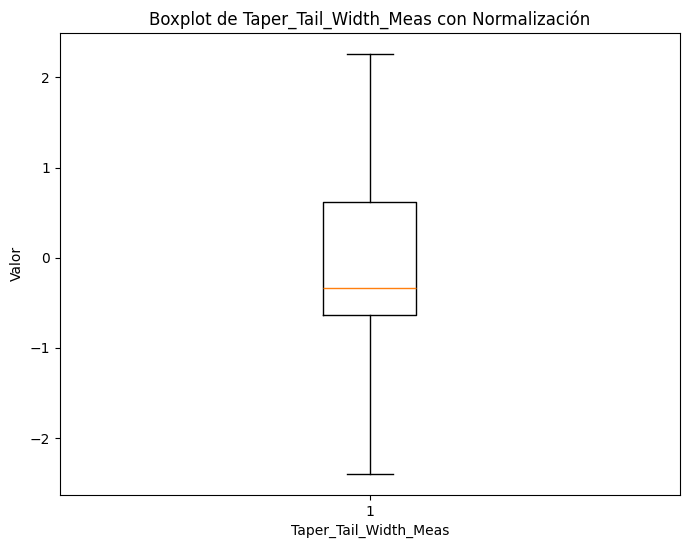

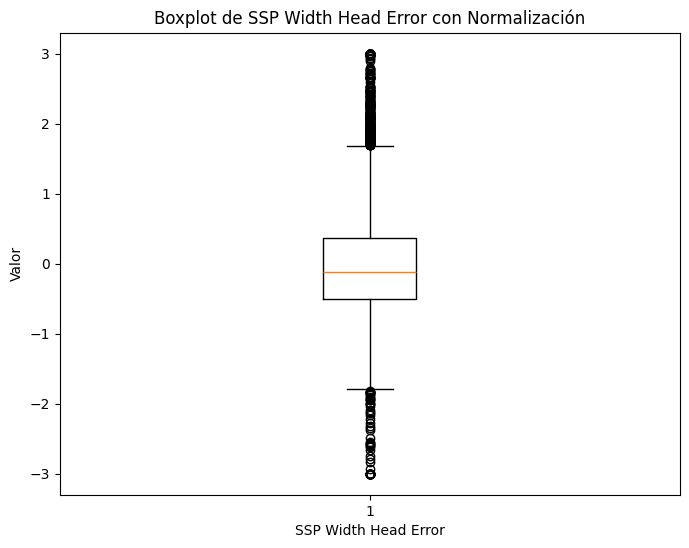

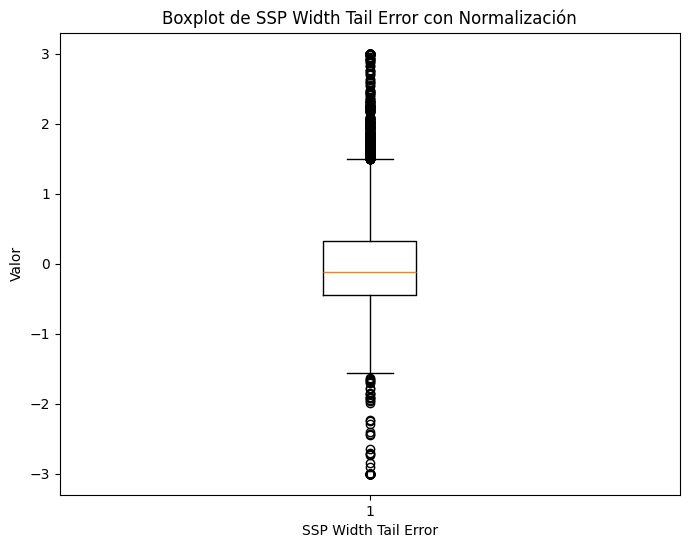

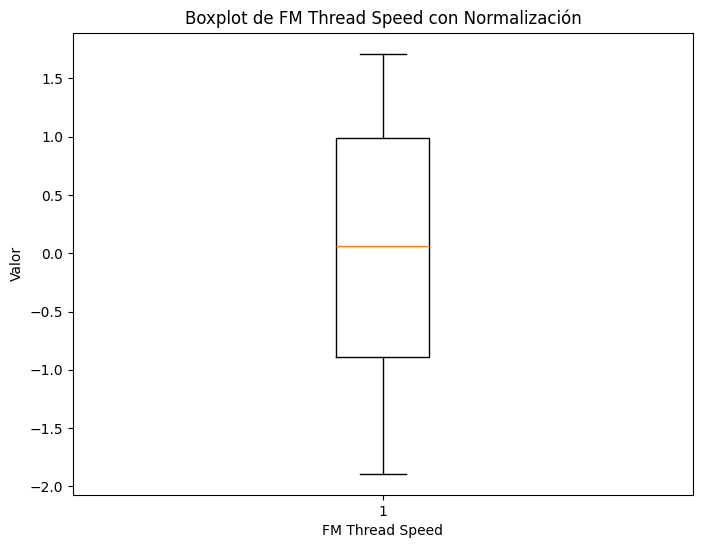

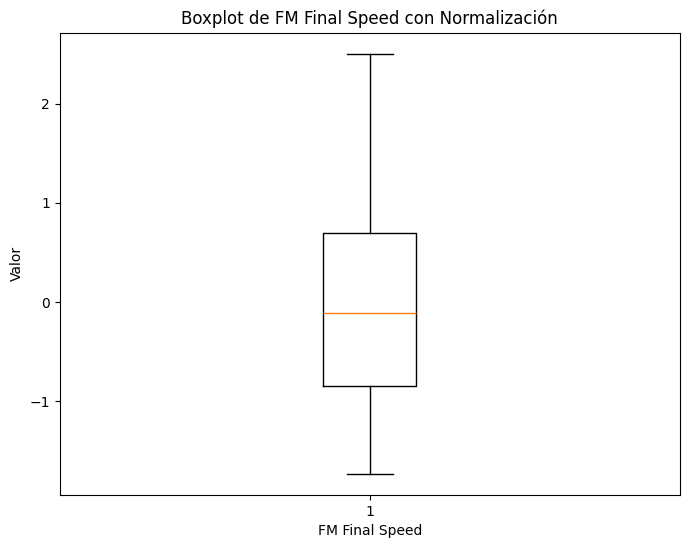

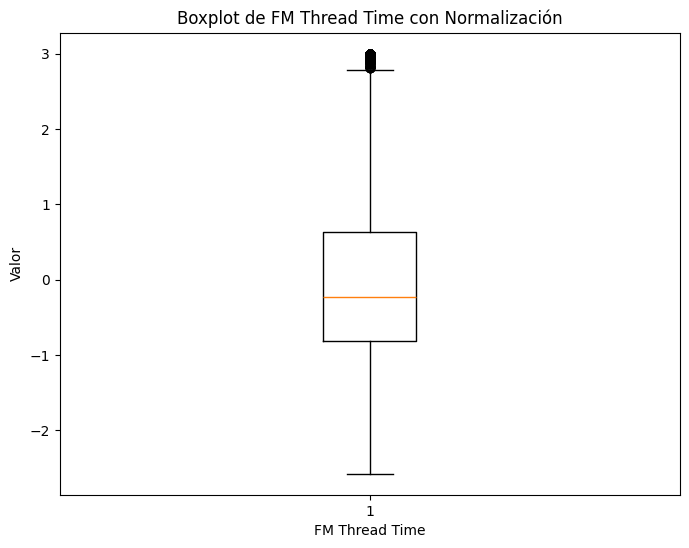

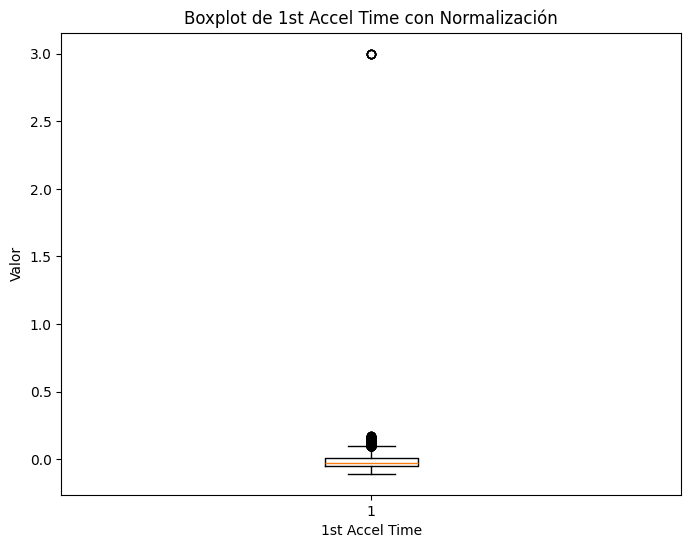

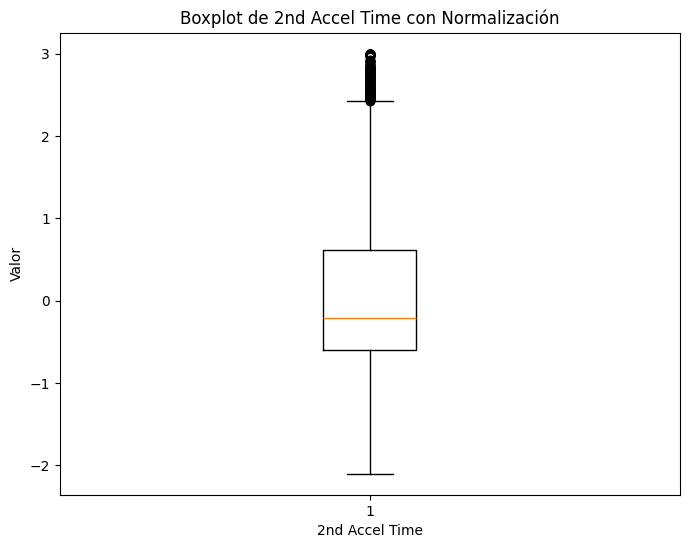

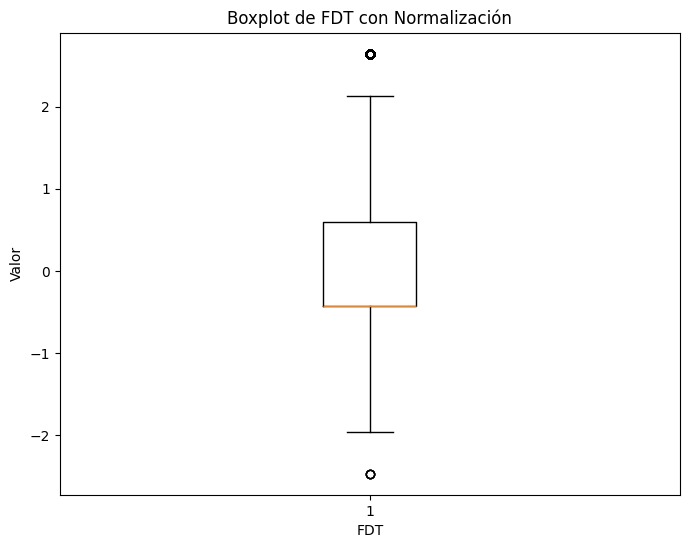

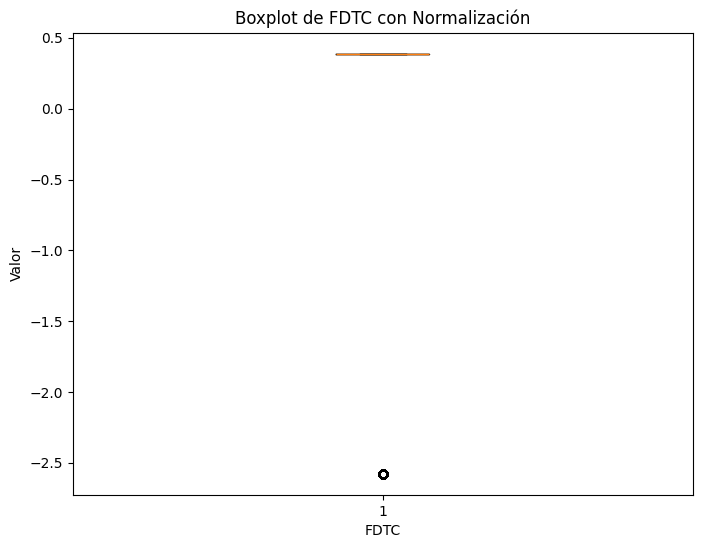

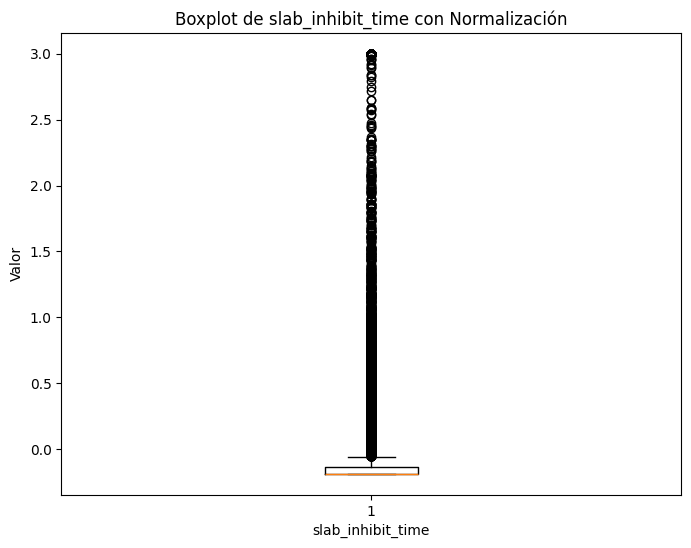

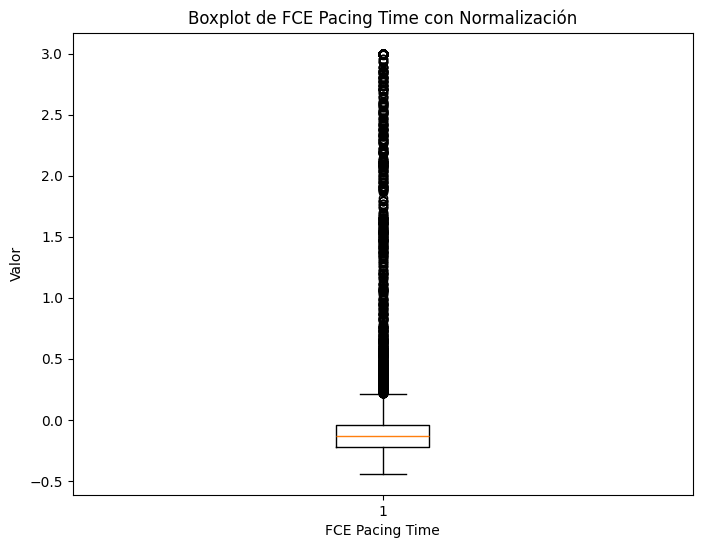

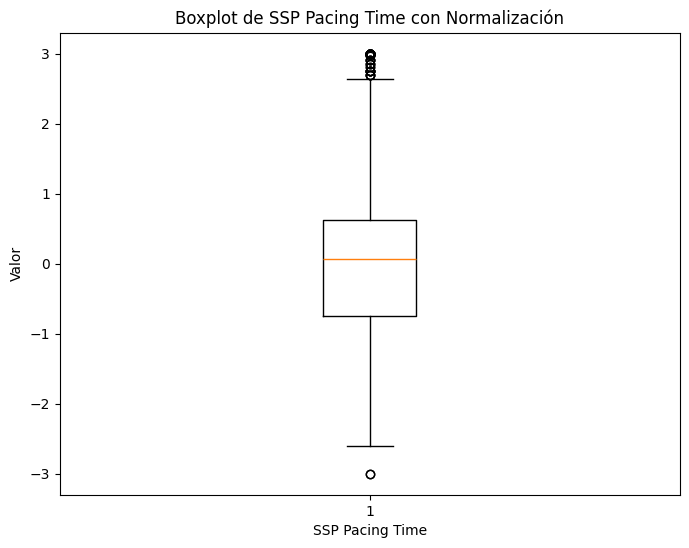

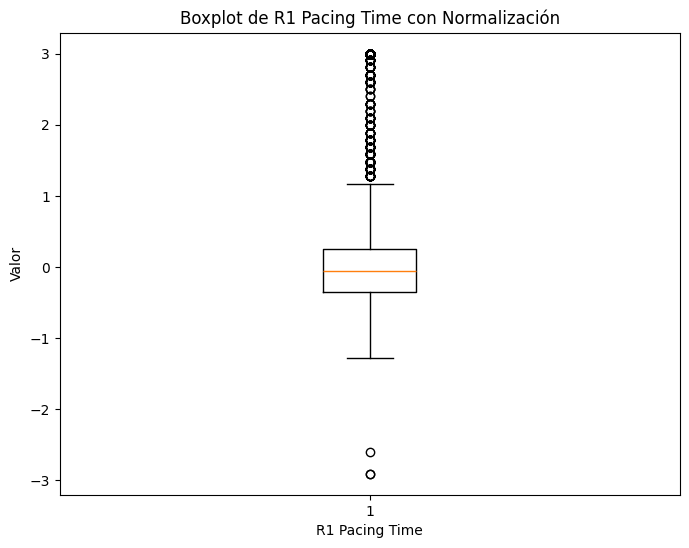

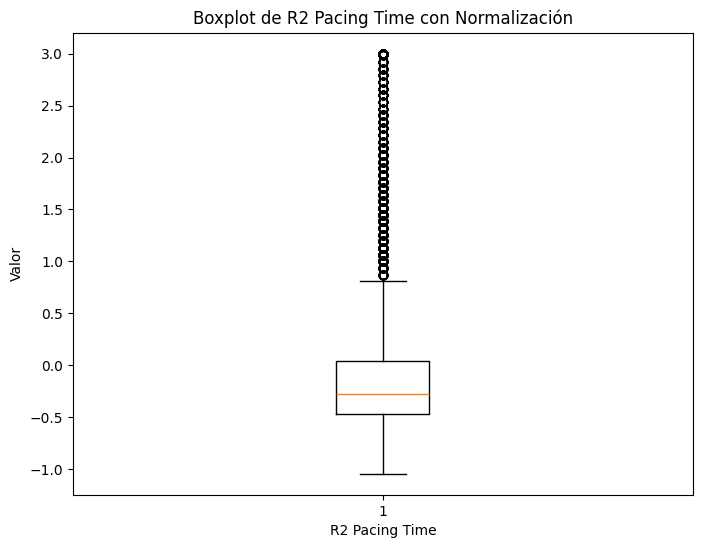

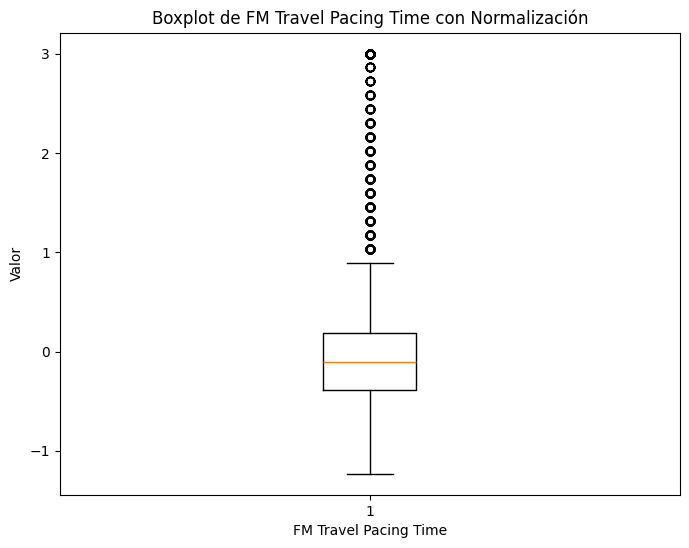

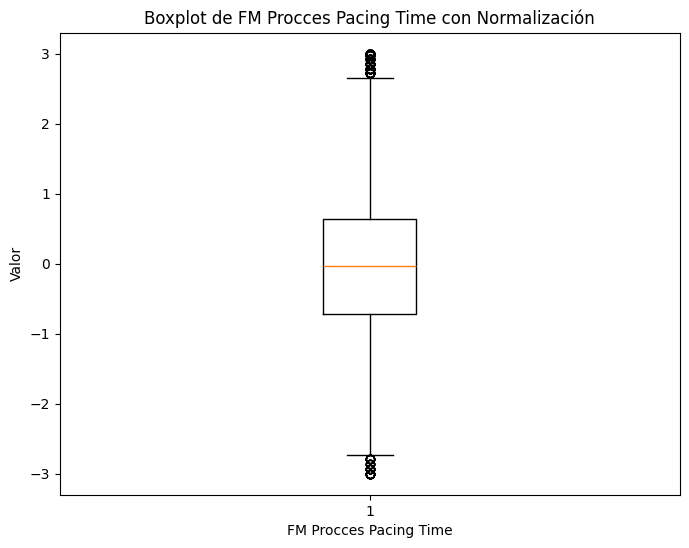

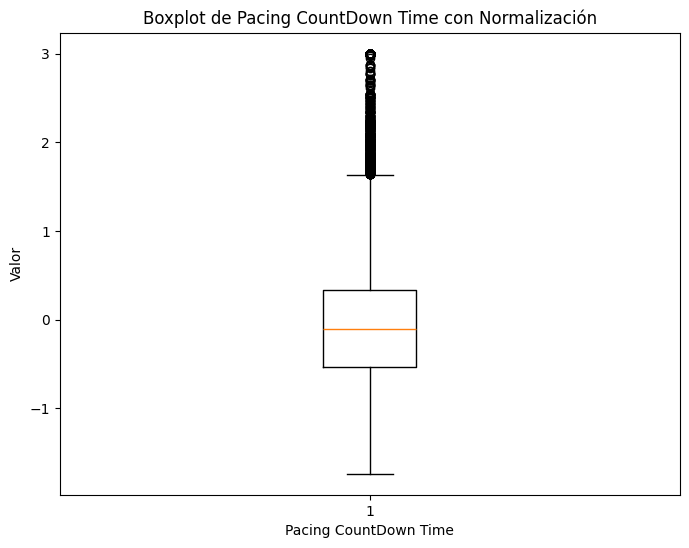

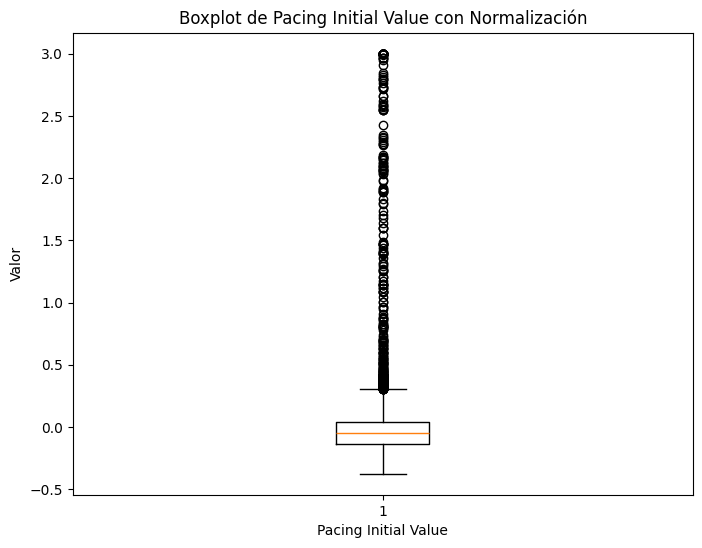

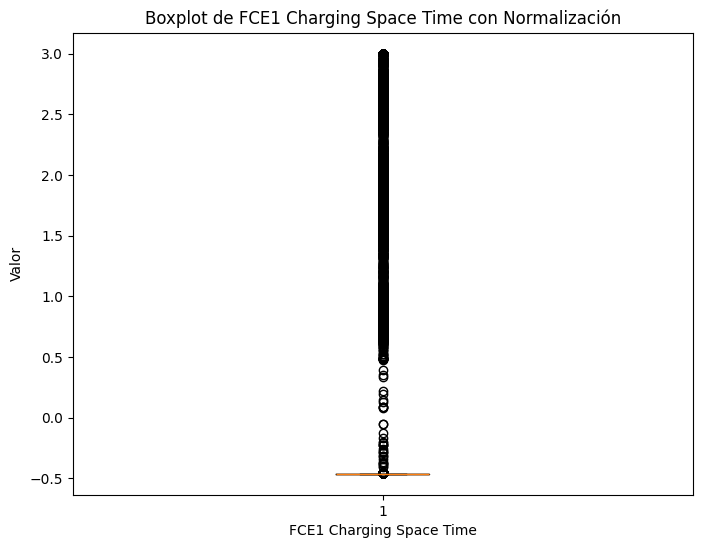

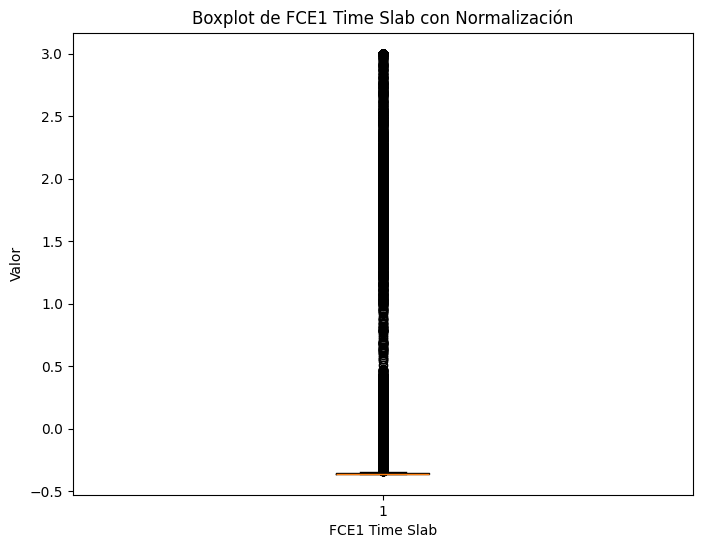

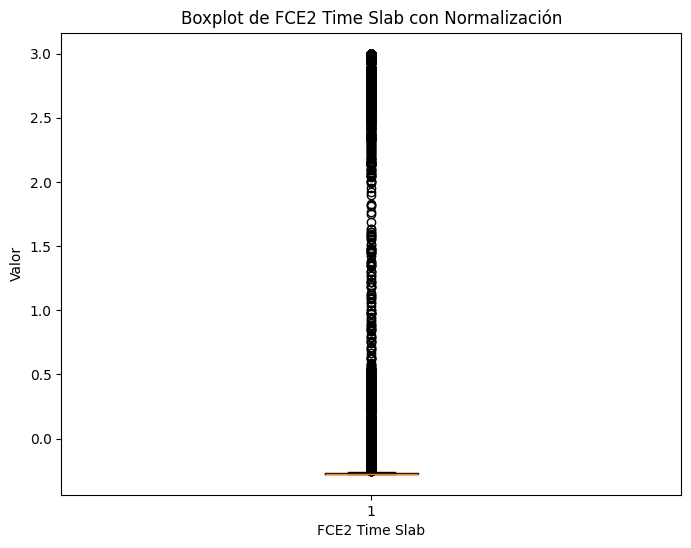

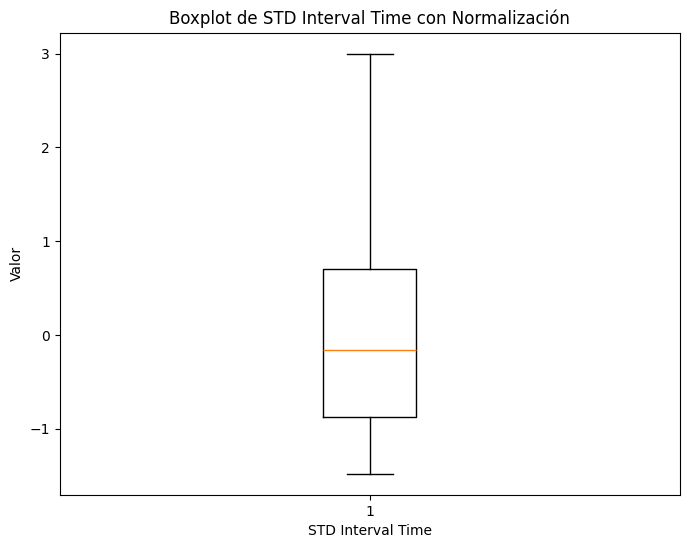

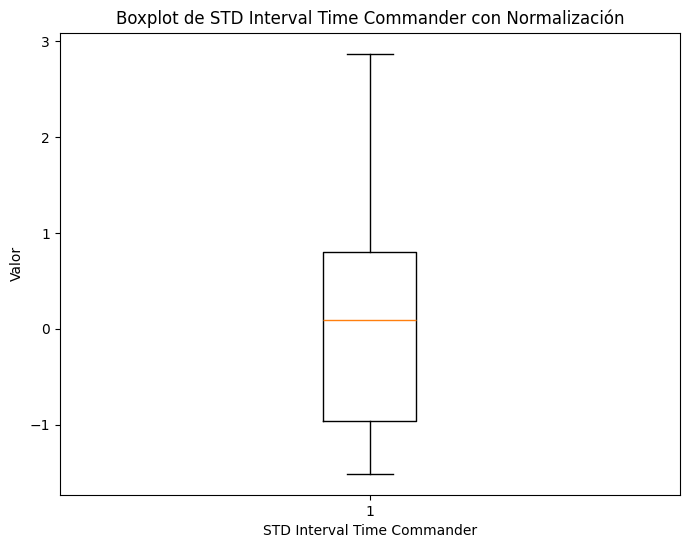

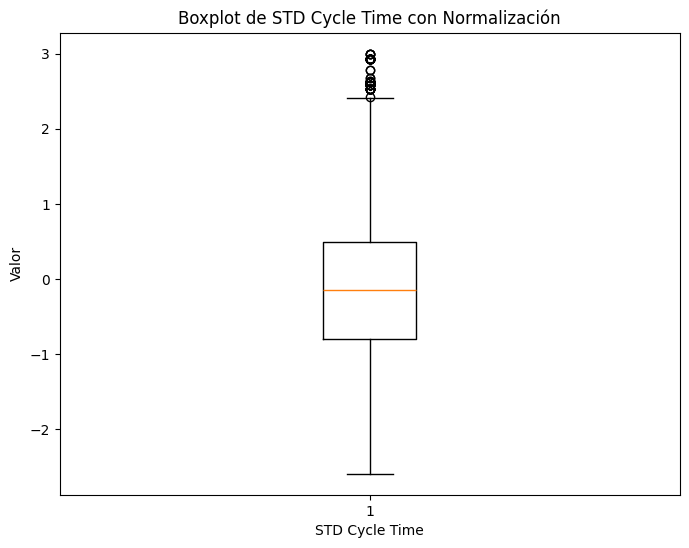

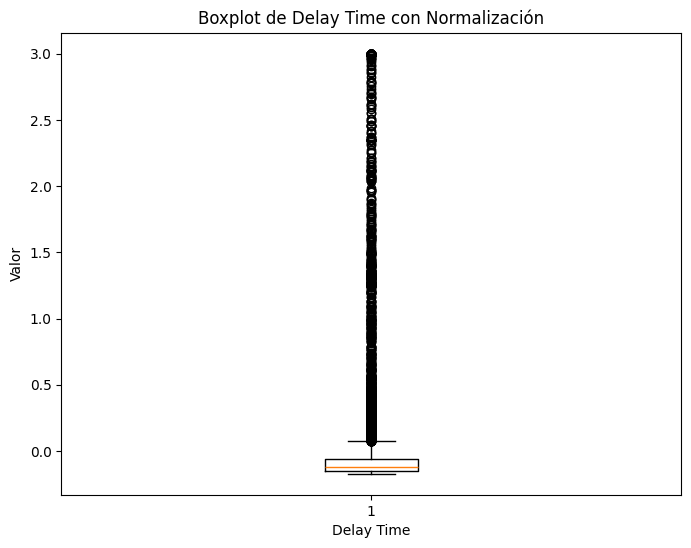

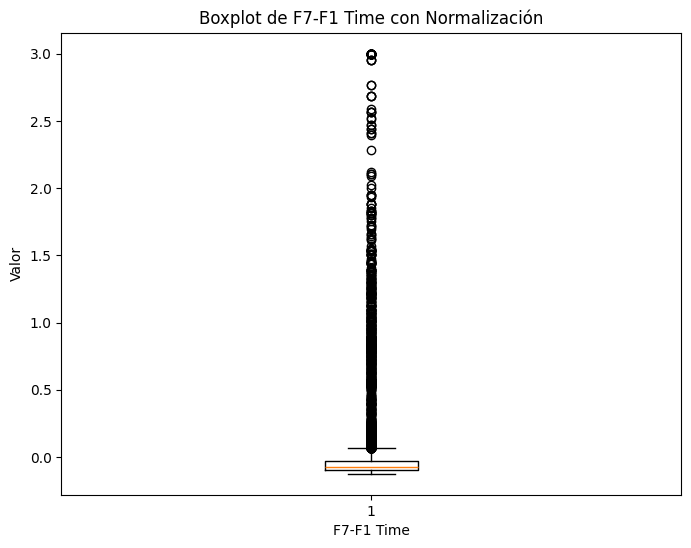

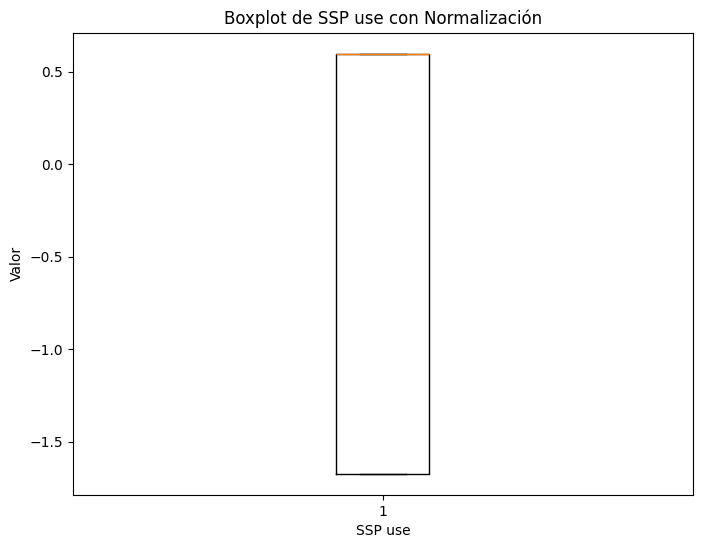

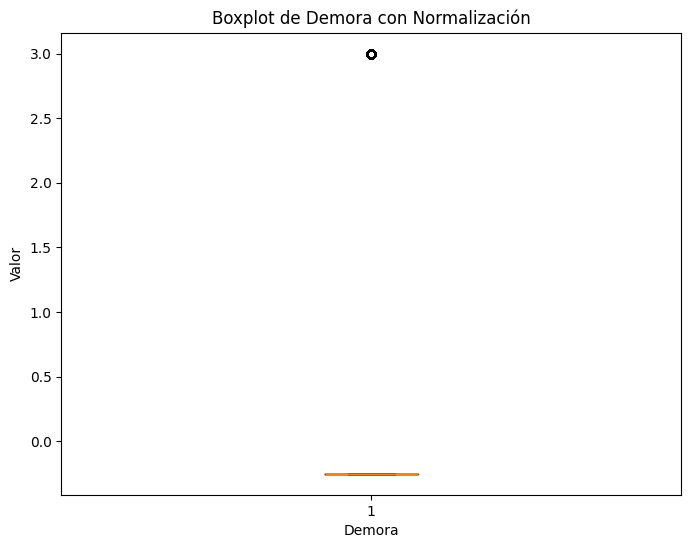

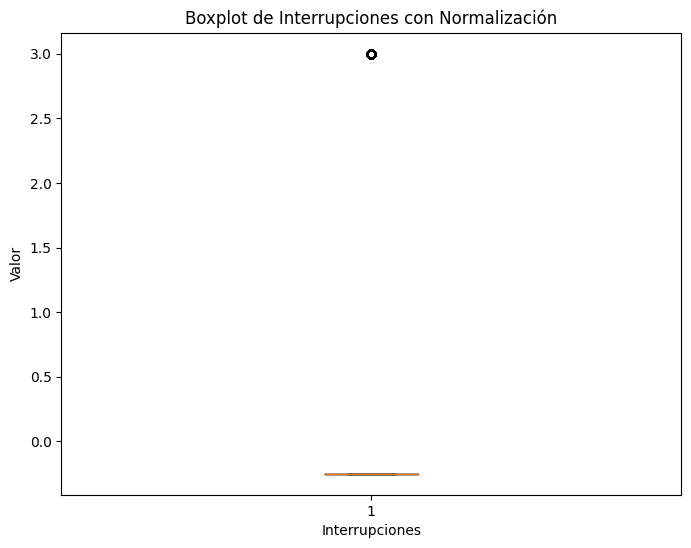

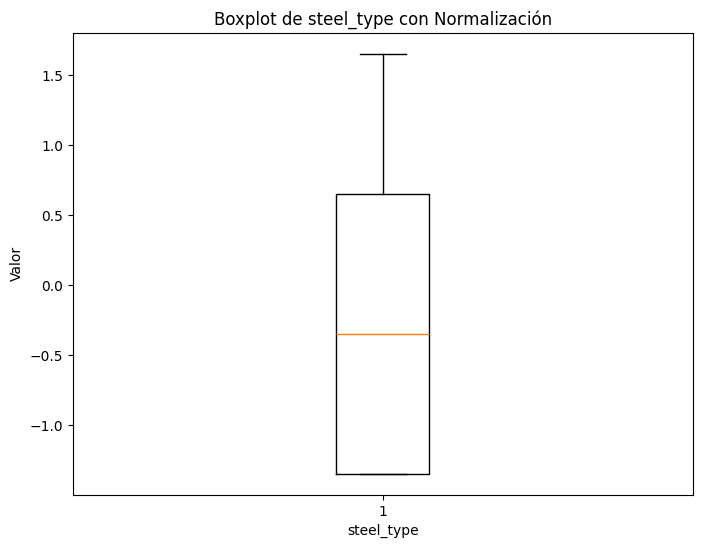

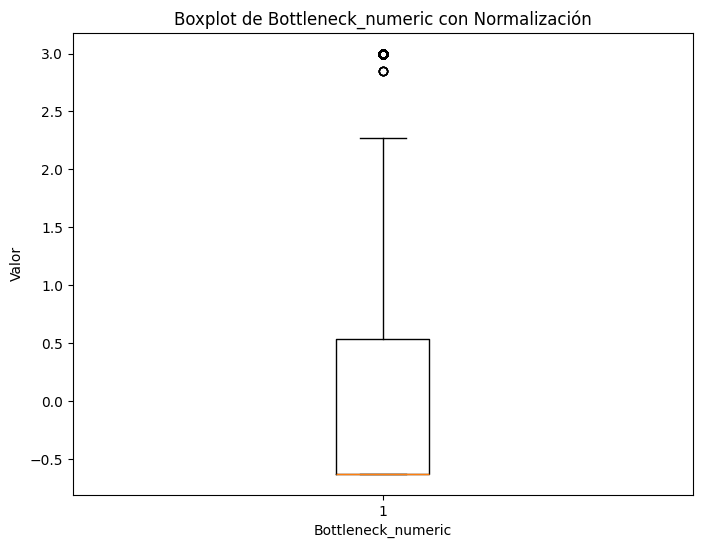

In [8]:
# Obtener los outliers de Normalized_Mean
outliers_normalized = data_normalized[(data_normalized > 3) | (data_normalized < -3)]

# Graficar los outliers para cada columna
for column in outliers_normalized.columns:
  plt.figure(figsize=(8, 6))
  plt.boxplot(data_normalized[column])
  plt.title(f"Boxplot de {column} con Normalización")
  plt.xlabel(column)
  plt.ylabel("Valor")

  # Mostrar valores de los outliers en el gráfico
  outliers_column = outliers_normalized[column][outliers_normalized[column].notnull()]
  if not outliers_column.empty:
    plt.scatter(x=[1] * len(outliers_column), y=outliers_column, color='red', label='Outliers')
    plt.legend()

  plt.show()

In [9]:
# Seleccionar solo las columnas numéricas excepto 'interrupciones'
data_numeric = data.select_dtypes(include='number').drop(columns=['Interrupciones', 'Demora', 'FCE Number', 'FDTC', 'SSP use', 'steel_type', 'Bottleneck_numeric'])

# Calcular el IQR y los límites
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

# Límites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reemplazar los outliers con NaN en las columnas seleccionadas
data[data_numeric.columns] = data_numeric.mask((data_numeric < lower_bound) | (data_numeric > upper_bound))

# Opcional: Rellenar los NaN resultantes con la mediana de cada columna
data.fillna(data_numeric.median(), inplace=True)

In [10]:
data.head()

,FCE Number,Slab Width,Slab Thickness,Slab Lenght,Slab Weight,slab_width_charge,Commander Slab Speed,PC Width,PC Thickness,PC Length,...,STD Interval Time,STD Interval Time Commander,STD Cycle Time,Delay Time,F7-F1 Time,SSP use,Demora,Interrupciones,steel_type,Bottleneck_numeric
0,2,1580,222.0,7262,20.36,1581.0,21.11,1151.0,222.0,8707.0,...,88.0,47.0,143.8,45.0,25.21,1.0,0,0,1,3
1,1,1579,222.0,7277,20.45,1359.0,21.11,1152.0,224.0,11481.0,...,88.0,29.0,143.8,19.0,88.02,1.0,0,0,1,1
2,2,1579,222.0,8705,23.13,1359.0,21.93,1151.0,222.0,8707.0,...,92.0,47.0,143.8,31.0,38.09,1.0,0,0,0,1
3,1,1564,222.0,9593,26.89,1359.0,21.96,1152.0,224.0,11481.0,...,85.0,29.0,143.8,12.0,50.15,0.0,0,0,1,3
4,2,1562,222.0,8431,23.50,1359.0,21.88,1151.0,222.0,8707.0,...,74.0,47.0,143.8,40.0,98.61,0.0,0,0,1,8


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Extraer las correlaciones de la variable 'Interrupciones'
interrupciones_correlations = correlation_matrix['Interrupciones']

# Ordenar las correlaciones de mayor a menor
interrupciones_correlations_sorted = interrupciones_correlations.sort_values(ascending=False)

# Mostrar las correlaciones ordenadas
print(interrupciones_correlations_sorted)

Interrupciones                 1.000000
Demora                         0.986805
Bottleneck_numeric             0.166057
Commander Slab Speed           0.091023
FCE Pacing Time                0.061842
Pacing Initial Value           0.059329
Pacing CountDown Time          0.057941
FCE1 Time Slab                 0.055501
FM Thread Time                 0.035278
Slab Lenght                    0.031445
FM Travel Pacing Time          0.025302
SSP Pacing Time                0.022926
SSP use                        0.022641
steel_type                     0.021646
R1 Pacing Time                 0.020726
2nd Accel Time                 0.018929
FM Procces Pacing Time         0.015568
F7-F1 Time                     0.014572
PC Length                      0.013312
FCE2 Time Slab                 0.001716
R2 Pacing Time                 0.000051
slab_inhibit_time             -0.000382
1st Accel Time                -0.001843
slab_width_charge             -0.003283
FM Thread Speed               -0.005525


In [12]:
data['Interrupciones'].value_counts()

,count
Interrupciones,
0,17152
1,1067


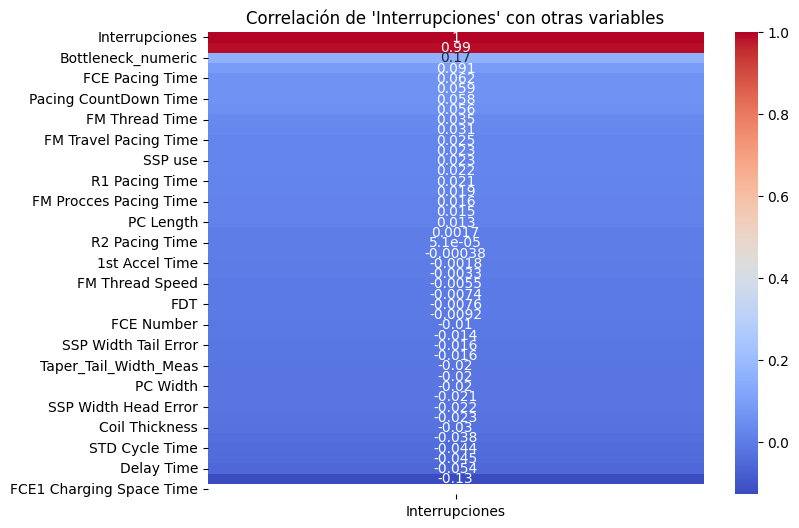

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya has calculado 'correlation_matrix'
# Seleccionar solo las correlaciones de 'Interrupciones' y ordenarlas de mayor a menor
correlation_with_interrupciones = correlation_matrix['Interrupciones'].sort_values(ascending=False)

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear un heatmap para mostrar la correlación de 'Interrupciones' con el resto de las variables
sns.heatmap(correlation_with_interrupciones.to_frame(), annot=True, cmap='coolwarm', cbar=True)

# Títulos y etiquetas
plt.title("Correlación de 'Interrupciones' con otras variables")
plt.show()

In [14]:
# value counts de interrupciones
data['Interrupciones'].value_counts()

,count
Interrupciones,
0,17152
1,1067


Construye gráficas que permitan analizar dependencias causales entre las variables.



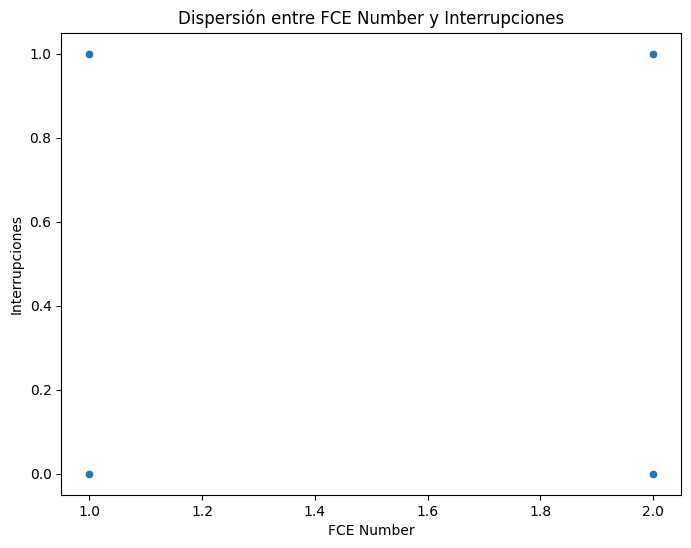

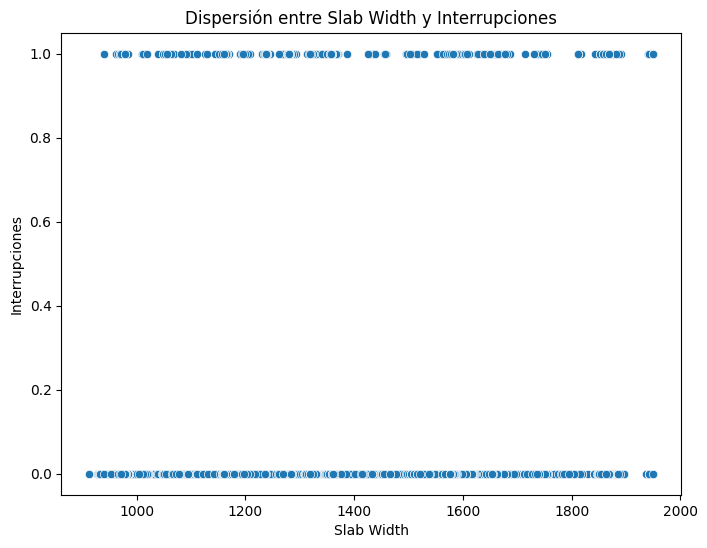

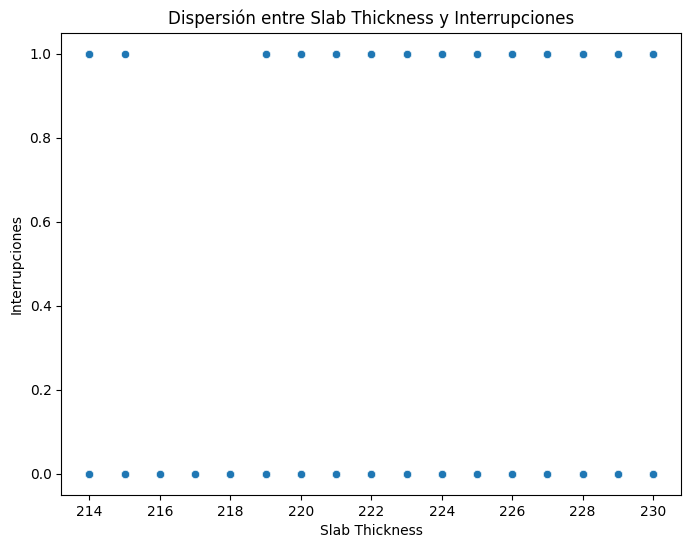

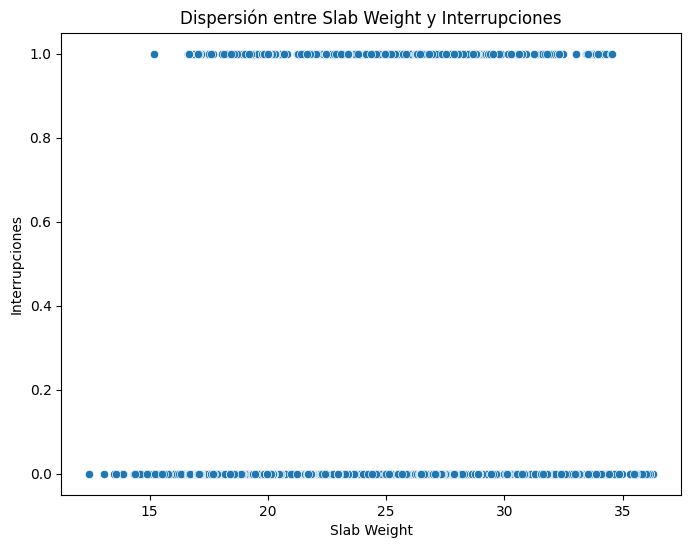

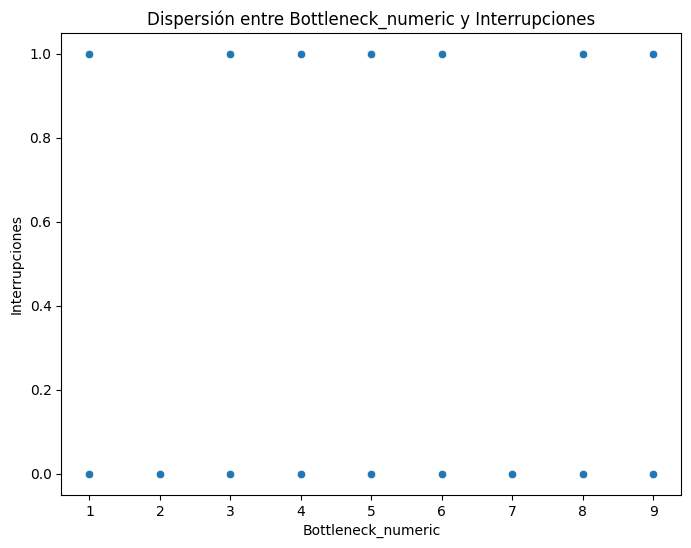

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listar las columnas que se desean analizar contra 'Interrupciones'
variables = ['FCE Number', 'Slab Width', 'Slab Thickness', 'Slab Weight', 'Bottleneck_numeric']  # Ajusta según tus columnas

# Crear gráficos de dispersión para cada variable contra 'Interrupciones'
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[var], y=data['Interrupciones'])
    plt.title(f'Dispersión entre {var} y Interrupciones')
    plt.xlabel(var)
    plt.ylabel('Interrupciones')
    plt.show()


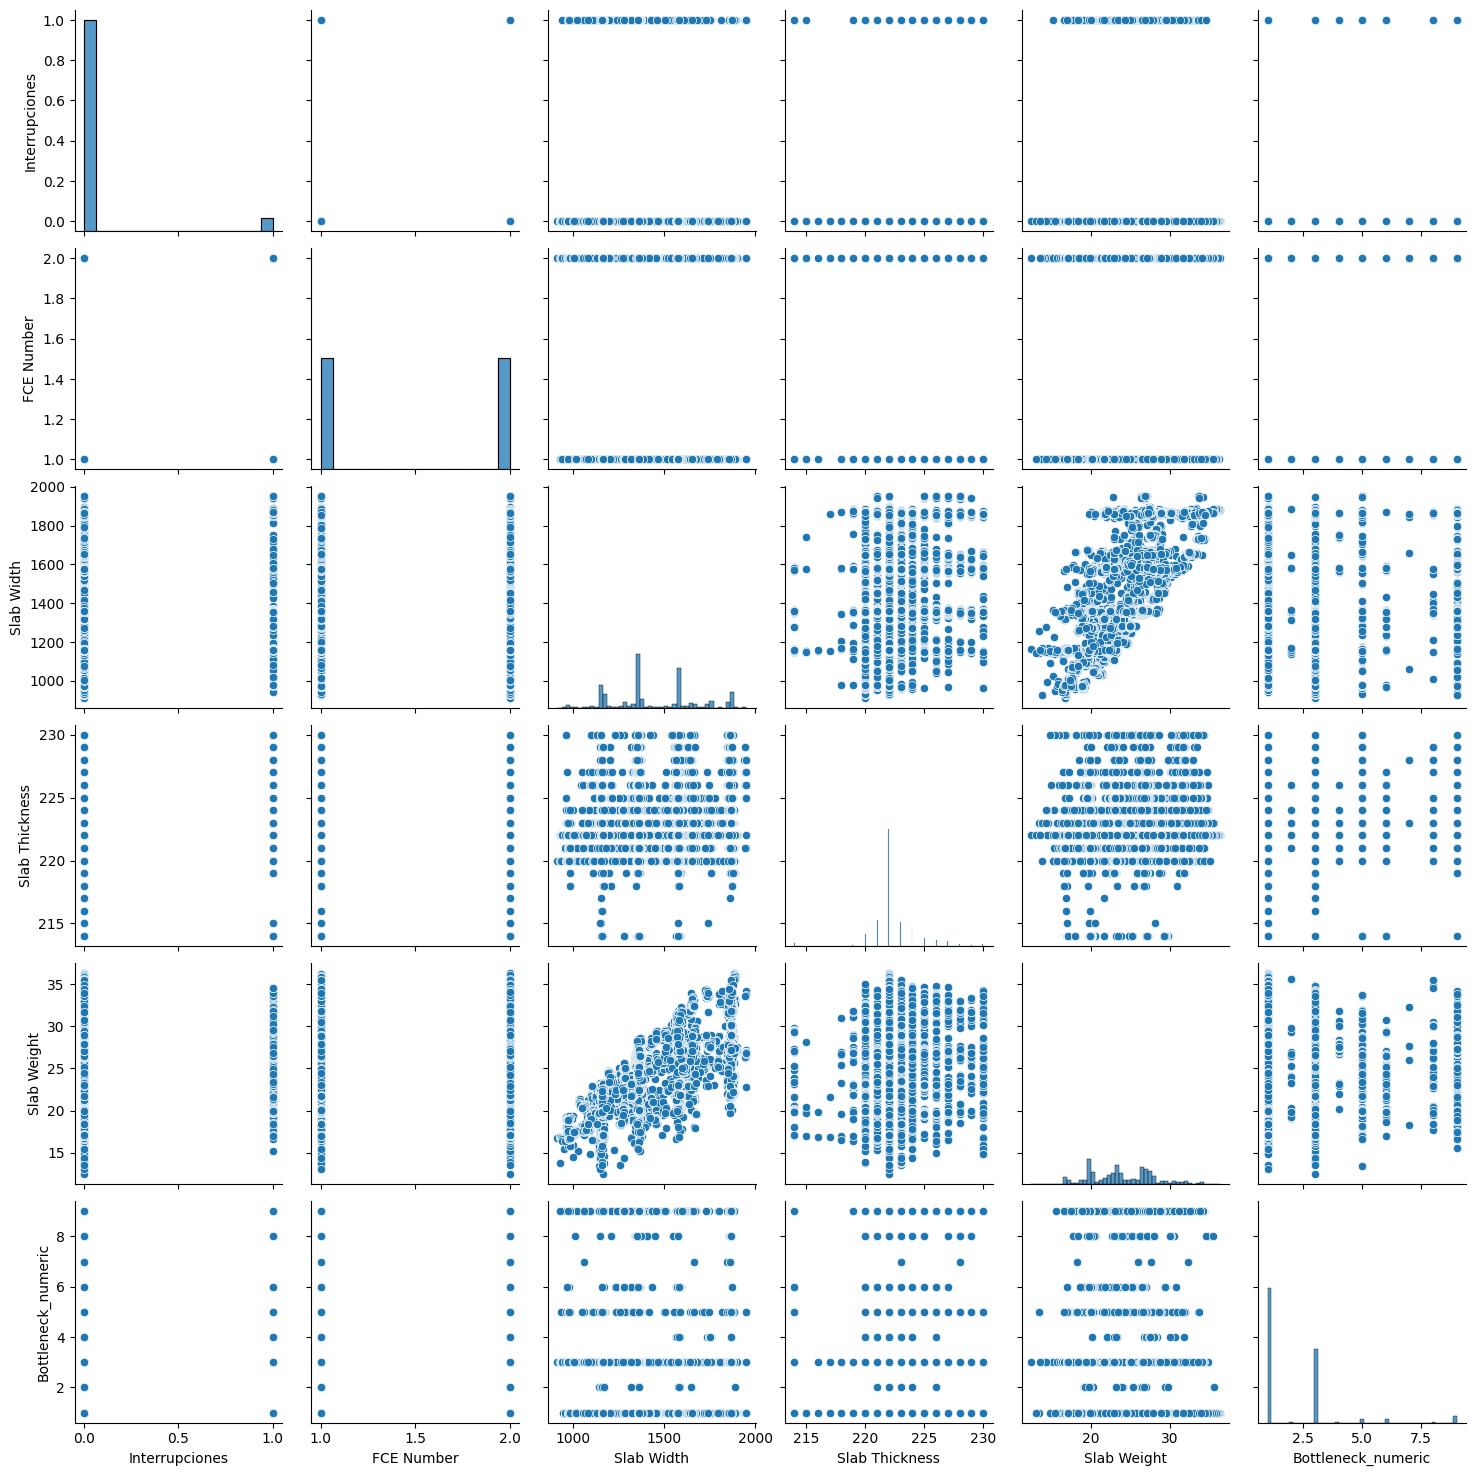

In [16]:
# Crear un gráfico de pares para observar dependencias entre 'Interrupciones' y otras variables
sns.pairplot(data, vars=['Interrupciones', 'FCE Number', 'Slab Width', 'Slab Thickness', 'Slab Weight', 'Bottleneck_numeric'])
plt.show()

# Modelización

In [17]:
data = data[(data['Bottleneck_numeric'] == 3) & (data['Interrupciones'] == 1)]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 261 to 18144
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FCE Number                   225 non-null    int64  
 1   Slab Width                   225 non-null    int64  
 2   Slab Thickness               225 non-null    float64
 3   Slab Lenght                  225 non-null    int64  
 4   Slab Weight                  225 non-null    float64
 5   slab_width_charge            225 non-null    float64
 6   Commander Slab Speed         225 non-null    float64
 7   PC Width                     225 non-null    float64
 8   PC Thickness                 225 non-null    float64
 9   PC Length                    225 non-null    float64
 10  Coil Thickness               225 non-null    float64
 11  Taper_Meas                   225 non-null    float64
 12  Taper_Head_Width_Meas        225 non-null    float64
 13  Taper_Tail_Width_Meas

In [19]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Extraer las correlaciones de la variable 'Interrupciones'
FM_correlations = correlation_matrix['FM Thread Time']

# Ordenar las correlaciones de mayor a menor
FM_correlations_sorted = FM_correlations.sort_values(ascending=False)

# Mostrar las correlaciones ordenadas
print(FM_correlations_sorted)


FM Thread Time                 1.000000
1st Accel Time                 0.779560
Coil Thickness                 0.585853
FM Travel Pacing Time          0.564756
Taper_Tail_Width_Meas          0.348563
Taper_Head_Width_Meas          0.348545
Slab Width                     0.348378
STD Interval Time              0.338466
Slab Weight                    0.270713
FM Procces Pacing Time         0.251341
STD Cycle Time                 0.161793
SSP use                        0.140348
Taper_Meas                     0.115745
Pacing Initial Value           0.109487
SSP Pacing Time                0.077803
SSP Width Head Error           0.072566
PC Length                      0.047616
Pacing CountDown Time          0.045081
Slab Thickness                 0.014318
SSP Width Tail Error           0.002618
PC Thickness                  -0.021348
R1 Pacing Time                -0.035252
Commander Slab Speed          -0.039294
FCE Number                    -0.047386
slab_inhibit_time             -0.057324


In [20]:
FM_correlations_sorted = FM_correlations.abs().sort_values(ascending=False)
FM_correlations_sorted

,FM Thread Time
FM Thread Time,1.000000
FM Thread Speed,0.793621
1st Accel Time,0.779560
FM Final Speed,0.654356
Coil Thickness,0.585853
FM Travel Pacing Time,0.564756
FDT,0.464451
R2 Pacing Time,0.442029
Taper_Tail_Width_Meas,0.348563
Taper_Head_Width_Meas,0.348545


#**Regresión Lineal Múltiple**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables X y la variable objetivo y
X = data[['FM Thread Speed', 'FM Final Speed', '1st Accel Time', 'FM Travel Pacing Time',
          'R2 Pacing Time', 'steel_type', 'Slab Width', 'Taper_Head_Width_Meas',
          'Taper_Tail_Width_Meas', 'Slab Weight', 'Slab Lenght', 'Slab Thickness']]
y = data['FM Thread Time']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
# Predecir en el conjunto de prueba
y_test_pred = model.predict(X_test)

# Evaluar el modelo con métricas de error de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluar el modelo con métricas de error de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test  = r2_score(y_test, y_test_pred)

#Conjunto de entrenamiento
print("Conjunto de entrenamiento: ")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2):", r2_train)

#Conjunto de prueba
print("Conjunto de prueba: ")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2):", r2_test)

# Coeficientes del modelo
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo:")
print(coef_df)

Conjunto de entrenamiento: 
Mean Squared Error (MSE): 2.857585623167184
R-squared (R2): 0.77927210963859
Conjunto de prueba: 
Mean Squared Error (MSE): 3.4838238868171794
R-squared (R2): 0.7635963762357485

Coeficientes del modelo:
                       Coeficiente
FM Thread Speed          -0.679536
FM Final Speed            0.137706
1st Accel Time            0.152609
FM Travel Pacing Time     0.378433
R2 Pacing Time           -0.038374
steel_type               -0.392667
Slab Width               -0.000043
Taper_Head_Width_Meas     0.017687
Taper_Tail_Width_Meas    -0.019773
Slab Weight               0.254484
Slab Lenght               0.000090
Slab Thickness           -0.116779


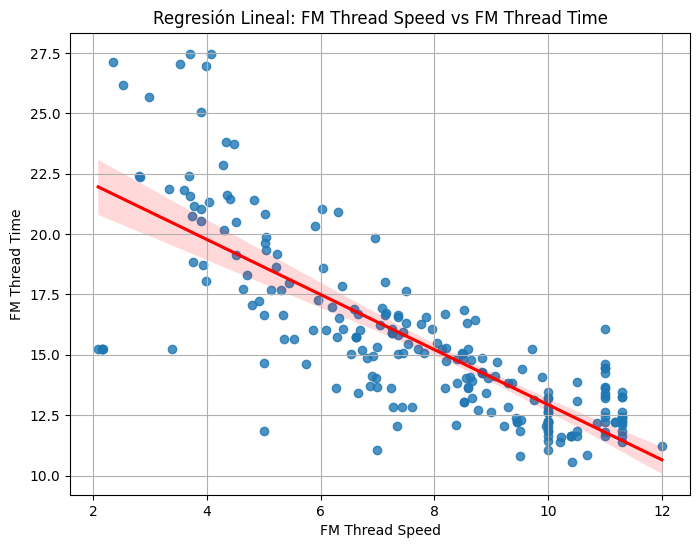

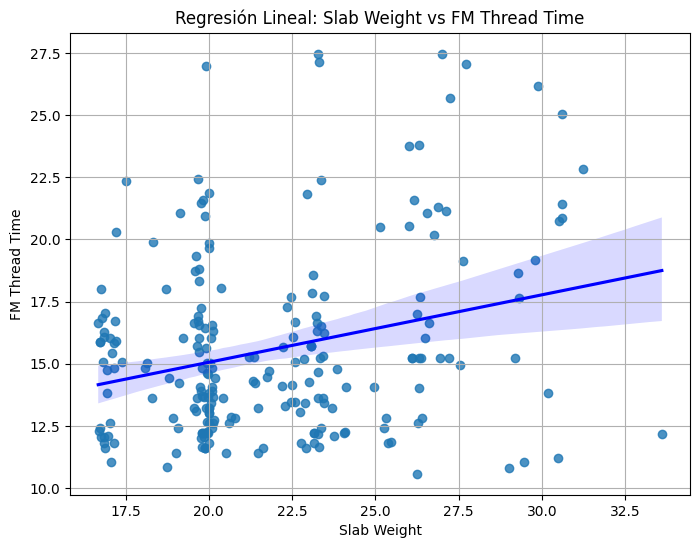

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la relación entre 'FM Thread Speed' y la variable dependiente
plt.figure(figsize=(8, 6))
sns.regplot(x=data['FM Thread Speed'], y=data['FM Thread Time'], line_kws={"color": "red"})
plt.title('Regresión Lineal: FM Thread Speed vs FM Thread Time')
plt.xlabel('FM Thread Speed')
plt.ylabel('FM Thread Time')
plt.grid(True)
plt.show()

# Visualizar la relación entre 'Slab Weight' y la variable dependiente
plt.figure(figsize=(8, 6))
sns.regplot(x=data['Slab Weight'], y=data['FM Thread Time'], line_kws={"color": "blue"})
plt.title('Regresión Lineal: Slab Weight vs FM Thread Time')
plt.xlabel('Slab Weight')
plt.ylabel('FM Thread Time')
plt.grid(True)
plt.show()


#**Regresión logística**

Métricas de entrenamiento: 
Accuracy: 0.8833333333333333
Matriz de Confusión:
 [[96 12]
 [ 9 63]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       108
           1       0.84      0.88      0.86        72

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

Métricas de prueba: 
Accuracy: 0.9111111111111111
Matriz de Confusión:
 [[26  2]
 [ 2 15]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45


Coeficientes del modelo:
                       Coeficiente
FM Thread Speed          -0.216920
FM Fina

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


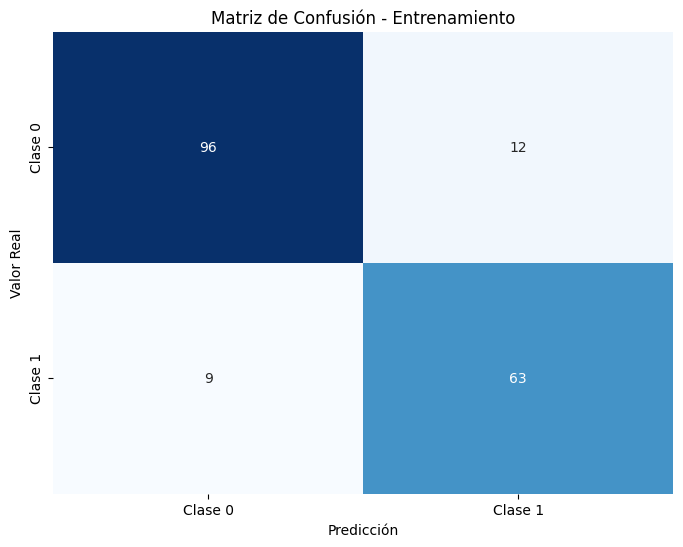

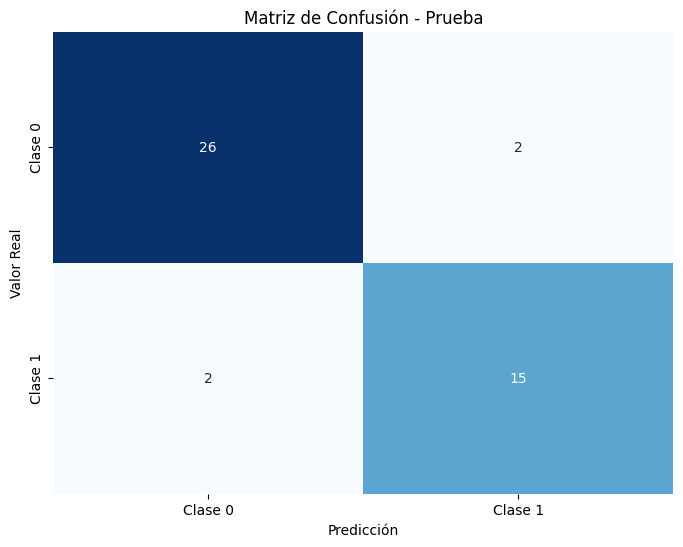

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Seleccionar las variables X y la variable objetivo y (clasificación)
X = data[['FM Thread Speed', 'FM Final Speed', '1st Accel Time', 'FM Travel Pacing Time',
          'R2 Pacing Time', 'steel_type', 'Slab Width', 'Taper_Head_Width_Meas',
          'Taper_Tail_Width_Meas', 'Slab Weight', 'Slab Lenght', 'Slab Thickness']]

# Crear una nueva variable objetivo binaria: 1 si 'FM Thread Time' > media, 0 si no
y = (data['FM Thread Time'] > data['FM Thread Time'].mean()).astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento
y_train_pred = log_model.predict(X_train)
# Predecir en el conjunto de prueba
y_test_pred = log_model.predict(X_test)

# Evaluar el modelo con métricas de clasificación
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)
print("Métricas de entrenamiento: ")
print("Accuracy:", accuracy_train)
print("Matriz de Confusión:\n", conf_matrix_train)
print("Reporte de Clasificación:\n", class_report_train)

# Evaluar el modelo con métricas de clasificación
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)
print("Métricas de prueba: ")
print("Accuracy:", accuracy_test)
print("Matriz de Confusión:\n", conf_matrix_test)
print("Reporte de Clasificación:\n", class_report_test)

# Coeficientes del modelo
coef_df = pd.DataFrame(log_model.coef_.flatten(), X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo:")
print(coef_df)

# Función para visualizar la matriz de confusión con seaborn
def plot_confusion_matrix(cm, title='Matriz de Confusión'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title(title)
    plt.show()

# Visualizar la matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(conf_matrix_train, title='Matriz de Confusión - Entrenamiento')

# Visualizar la matriz de confusión para el conjunto de prueba
plot_confusion_matrix(conf_matrix_test, title='Matriz de Confusión - Prueba')


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Seleccionar las variables X y la variable objetivo y (clasificación)
X = data[['FM Thread Speed', 'FM Final Speed', '1st Accel Time', 'FM Travel Pacing Time',
          'R2 Pacing Time', 'steel_type', 'Slab Width', 'Taper_Head_Width_Meas',
          'Taper_Tail_Width_Meas', 'Slab Weight', 'Slab Lenght', 'Slab Thickness']]

# Crear una nueva variable objetivo binaria: 1 si 'FM Thread Time' > media, 0 si no
y = (data['FM Thread Time'] > data['FM Thread Time'].mean()).astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


# Predecir en el conjunto de entrenamiento
y_train_pred = log_model.predict(X_train)
# Predecir en el conjunto de prueba
y_test_pred = log_model.predict(X_test)

# Evaluar el modelo con métricas de clasificación
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)
print("Métricas de entrenamiento: ")
print("Accuracy:", accuracy_train)
print("Matriz de Confusión:\n", conf_matrix_train)
print("Reporte de Clasificación:\n", class_report_train)

# Evaluar el modelo con métricas de clasificación
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)
print("Métricas de prueba: ")
print("Accuracy:", accuracy_test)
print("Matriz de Confusión:\n", conf_matrix_test)
print("Reporte de Clasificación:\n", class_report_test)

# Coeficientes del modelo
coef_df = pd.DataFrame(log_model.coef_.flatten(), X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo:")
print(coef_df)

Métricas de entrenamiento: 
Accuracy: 0.8833333333333333
Matriz de Confusión:
 [[96 12]
 [ 9 63]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       108
           1       0.84      0.88      0.86        72

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

Métricas de prueba: 
Accuracy: 0.9111111111111111
Matriz de Confusión:
 [[26  2]
 [ 2 15]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45


Coeficientes del modelo:
                       Coeficiente
FM Thread Speed          -0.216920
FM Fina

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#**KNN**

In [25]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Paso 1: Separar características (X) y la variable objetivo (y)
X = data[['FM Thread Speed', 'FM Final Speed', '1st Accel Time', 'FM Travel Pacing Time',
          'R2 Pacing Time', 'steel_type', 'Slab Width', 'Taper_Head_Width_Meas',
          'Taper_Tail_Width_Meas', 'Slab Weight', 'Slab Lenght', 'Slab Thickness']]
y = (data['FM Thread Time'] > data['FM Thread Time'].mean()).astype(int)

# Paso 2: Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paso 4: Entrenar el modelo KNN con diferentes valores de K
k_values = [3, 5, 10]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = knn.predict(X_test)

    # Evaluación
    print(f'Resultados para K={k}:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Resultados para K=3:
[[26  2]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.89      0.94      0.91        17

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Resultados para K=5:
[[23  5]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.76      0.94      0.84        17

    accuracy                           0.87        45
   macro avg       0.86      0.88      0.86        45
weighted avg       0.88      0.87      0.87        45

Resultados para K=10:
[[24  4]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.78      0.82      0.80        17

    accuracy                           0.84        45
   macr

In [26]:
# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.67%


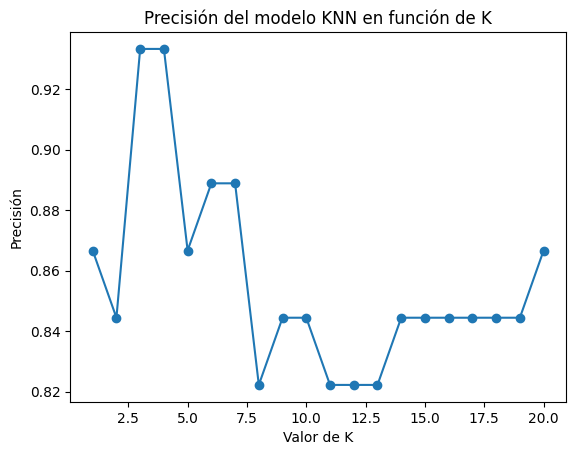

In [27]:
# Paso 5: Visualizar cómo cambia la precisión con diferentes valores de k
accuracy_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

# Graficar precisión vs k
plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.title('Precisión del modelo KNN en función de K')
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.show()


#**Random forest**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Datos X y la variable objetivo y
X = data[['FM Thread Speed', 'FM Final Speed', '1st Accel Time', 'FM Travel Pacing Time',
          'R2 Pacing Time', 'steel_type', 'Slab Width', 'Taper_Head_Width_Meas',
          'Taper_Tail_Width_Meas', 'Slab Weight', 'Slab Lenght', 'Slab Thickness']]
y = (data['FM Thread Time'] > data['FM Thread Time'].mean()).astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Matriz de Confusión:\n", conf_matrix)
print("Reporte de Clasificación:\n", class_report)

# Importancia de las características (Feature Importance)
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importancia']).sort_values(by='Importancia', ascending=False)
print("\nImportancia de las características:")
print(feature_importances)

Accuracy: 0.8888888888888888
Matriz de Confusión:
 [[25  3]
 [ 2 15]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45


Importancia de las características:
                       Importancia
1st Accel Time            0.226994
FM Thread Speed           0.217276
FM Final Speed            0.176019
FM Travel Pacing Time     0.084399
steel_type                0.058994
R2 Pacing Time            0.040792
Slab Width                0.040244
Slab Lenght               0.038779
Taper_Tail_Width_Meas     0.036030
Taper_Head_Width_Meas     0.036012
Slab Weight               0.030558
Slab Thickness            0.013902


In [29]:
# media de FM Thread time
data['FM Thread Time'].mean()

15.56928888888889

Text(0.5, 1.0, 'Distribución de FM Thread Time')

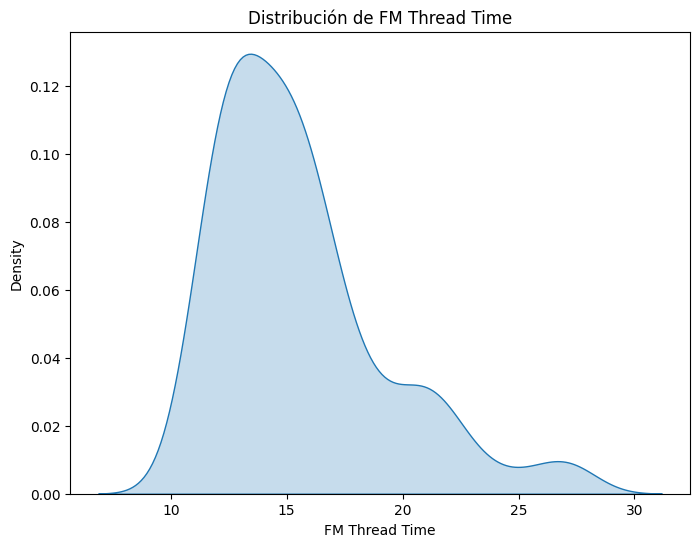

In [30]:
# grafico de densidad de FM Thread Time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='FM Thread Time', fill=True)
plt.title('Distribución de FM Thread Time')


# ANOVA e Intervalos de Confianza



Resultados del ANOVA:
F-statistic: 11.806295111592876, p-value: 3.3404056707142376e-07


<ipython-input-31-07d668136331>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='steel_type', y='FM Thread Time', data=data, palette='Set2')


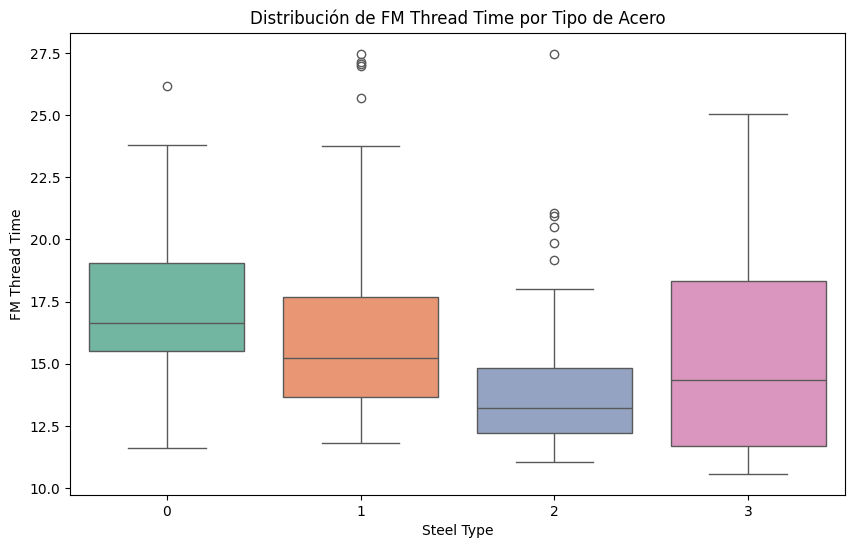

In [31]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que 'steel_type' esté tratada como categoría
data['steel_type'] = data['steel_type'].astype('category')

# Realizar el ANOVA para la variable 'FM Thread Time' según 'steel_type'
anova_result = stats.f_oneway(
    *[data.loc[data['steel_type'] == steel, 'FM Thread Time'] for steel in data['steel_type'].unique()]
)

print("Resultados del ANOVA:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Visualización de los resultados del ANOVA con un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='steel_type', y='FM Thread Time', data=data, palette='Set2')
plt.title('Distribución de FM Thread Time por Tipo de Acero')
plt.xlabel('Steel Type')
plt.ylabel('FM Thread Time')
plt.show()

In [32]:
# Obtener las predicciones para cada modelo
lin_preds = model.predict(X_test)
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Convertir las predicciones en un DataFrame
predictions_df = pd.DataFrame({
    'LinearRegression': lin_preds,
    'LogisticRegression': log_preds,
    'RandomForest': rf_preds,
    'Actual': y_test
})

# Calcular ANOVA (Análisis de Varianza) entre los tres modelos
anova_result = stats.f_oneway(predictions_df['LinearRegression'],
                              predictions_df['LogisticRegression'],
                              predictions_df['RandomForest'])
print("ANOVA results:", anova_result)

ANOVA results: F_onewayResult(statistic=887.1038661211577, pvalue=2.928494997941853e-77)


In [33]:
from sklearn.inspection import permutation_importance
import numpy as np

# Calculamos la importancia permutada en el conjunto de prueba
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)

# Extraemos las importancias y sus intervalos de confianza
sorted_idx = perm_importance.importances_mean.argsort()[::-1]  # Ordenar de mayor a menor

print("\nImportancia permutada de las características con intervalos de confianza:")
for idx in sorted_idx:
    feature_name = X.columns[idx]
    mean_importance = perm_importance.importances_mean[idx]
    std_importance = perm_importance.importances_std[idx]
    confidence_interval = (mean_importance - 1.96 * std_importance, mean_importance + 1.96 * std_importance)

    print(f"{feature_name}: {mean_importance:.4f} (95% CI: {confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")


Importancia permutada de las características con intervalos de confianza:
Slab Lenght: 0.0067 (95% CI: -0.0162, 0.0296)
FM Travel Pacing Time: 0.0015 (95% CI: -0.0569, 0.0598)
Slab Weight: -0.0007 (95% CI: -0.0185, 0.0170)
FM Thread Speed: -0.0022 (95% CI: -0.0448, 0.0404)
Slab Width: -0.0037 (95% CI: -0.0336, 0.0262)
Slab Thickness: -0.0044 (95% CI: -0.0280, 0.0191)
1st Accel Time: -0.0089 (95% CI: -0.0680, 0.0502)
Taper_Tail_Width_Meas: -0.0133 (95% CI: -0.0443, 0.0177)
steel_type: -0.0178 (95% CI: -0.0589, 0.0234)
R2 Pacing Time: -0.0200 (95% CI: -0.0544, 0.0144)
Taper_Head_Width_Meas: -0.0207 (95% CI: -0.0612, 0.0197)
FM Final Speed: -0.0252 (95% CI: -0.0712, 0.0208)


In [34]:
# Calcular los intervalos de confianza para los coeficientes del modelo de regresión logística
coef = log_model.coef_.flatten()  # Coeficientes del modelo
std_err = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))))  # Estimación de error estándar
z = 1.96  # Valor z para un intervalo de confianza del 95%

confidence_intervals = []
for i, c in enumerate(coef):
    lower_bound = c - z * std_err[i]
    upper_bound = c + z * std_err[i]
    confidence_intervals.append((X.columns[i], lower_bound, upper_bound))

# Mostrar los coeficientes con sus intervalos de confianza
print("\nIntervalos de confianza para los coeficientes del modelo de regresión logística:")
for variable, lower, upper in confidence_intervals:
    print(f"{variable}: ({lower:.4f}, {upper:.4f})")


Intervalos de confianza para los coeficientes del modelo de regresión logística:
FM Thread Speed: (-0.4327, -0.0011)
FM Final Speed: (-0.0230, 0.1613)
1st Accel Time: (0.2577, 0.3457)
FM Travel Pacing Time: (0.3727, 0.4930)
R2 Pacing Time: (-0.0726, 0.0257)
steel_type: (-1.2166, -0.8872)
Slab Width: (-0.0061, 0.0082)
Taper_Head_Width_Meas: (0.0128, 0.0490)
Taper_Tail_Width_Meas: (-0.0494, -0.0119)
Slab Weight: (-0.1910, 0.1807)
Slab Lenght: (-0.0001, 0.0008)
Slab Thickness: (-0.1236, -0.0647)


In [35]:
# Groupby steeltype y mean
data.groupby('steel_type')['FM Thread Time'].mean()

<ipython-input-35-0409ff214d20>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('steel_type')['FM Thread Time'].mean()


,FM Thread Time
steel_type,
0,17.281667
1,16.419649
2,13.980000
3,15.321333
